In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.impute import SimpleImputer



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\yuvik\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\yuvik\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\yuvik\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\yuvik\AppData\Roaming\Python\Python39\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "c:\Users\yuvik\anac

AttributeError: _ARRAY_API not found

In [7]:
import numpy
import pandas
import scipy
import matplotlib
print("NumPy version:", numpy.__version__)
print("All imports successful!")

NumPy version: 2.0.2
All imports successful!


In [8]:
import matplotlib as plt

In [9]:
import matplotlib
print(matplotlib.__version__)


3.9.4


In [157]:
import pandas as pd

file_path = 'merged_all.csv'
data = pd.read_csv(file_path)


In [213]:
import pandas as pd

file_path = 'cleaned_data.csv'
df = pd.read_csv(file_path)


In [214]:
print(df.shape)

(257577, 58)


In [215]:
total_nulls = df.isnull().sum().sum()
print(f"Total number of null values: {total_nulls}")

Total number of null values: 0


In [158]:
print(data.head())

   Unnamed: 0.1  Unnamed: 0   NCT Number  \
0         75209      118014  NCT00559130   
1          6356        9987  NCT00937664   
2        143427      226012  NCT00441597   
3        138885      218952  NCT03296228   
4          9769       15382  NCT00421603   

                                         Study Title  \
0  Efficacy Study of CytoSorb Hemoperfusion Devic...   
1  Safety and Tolerability Study of AZD7762 in Co...   
2  Does Atorvastatin Reduce Ischemia-Reperfusion ...   
3  Comparison of Dynamic Radiographs in Determini...   
4  A Placebo-Controlled Study of Mixed Amphetamin...   

                                      Study URL Acronym Study Status  \
0  https://clinicaltrials.gov/study/NCT00559130     NaN    COMPLETED   
1  https://clinicaltrials.gov/study/NCT00937664     NaN   TERMINATED   
2  https://clinicaltrials.gov/study/NCT00441597     NaN    COMPLETED   
3  https://clinicaltrials.gov/study/NCT03296228     NaN    COMPLETED   
4  https://clinicaltrials.gov/study/NC

In [159]:
print(data.columns)

Index(['Unnamed: 0.1', 'Unnamed: 0', 'NCT Number', 'Study Title', 'Study URL',
       'Acronym', 'Study Status', 'Brief Summary', 'Study Results',
       'Conditions', 'Interventions', 'Primary Outcome Measures',
       'Secondary Outcome Measures', 'Other Outcome Measures', 'Sponsor',
       'Collaborators', 'Sex', 'Age', 'Phases', 'Enrollment', 'Funder Type',
       'Study Type', 'Study Design', 'Other IDs', 'Start Date',
       'Primary Completion Date', 'Completion Date', 'First Posted',
       'Results First Posted', 'Last Update Posted', 'Locations',
       'Study Documents', 'id', 'nct_id', 'result_group_id',
       'ctgov_group_code', 'period', 'reason', 'count',
       'drop_withdraw_comment', 'reason_comment', 'count_units',
       'sampling_method', 'gender', 'minimum_age', 'maximum_age',
       'healthy_volunteers', 'population', 'criteria', 'gender_description',
       'gender_based', 'adult', 'child', 'older_adult', 'status', 'name',
       'city', 'state', 'zip', 'countr

In [160]:
print(data.shape)

(257577, 73)


In [81]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257577 entries, 0 to 257576
Data columns (total 73 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0.1                257577 non-null  int64  
 1   Unnamed: 0                  257577 non-null  int64  
 2   NCT Number                  257577 non-null  object 
 3   Study Title                 257577 non-null  object 
 4   Study URL                   257577 non-null  object 
 5   Acronym                     63991 non-null   object 
 6   Study Status                257577 non-null  object 
 7   Brief Summary               257577 non-null  object 
 8   Study Results               257577 non-null  object 
 9   Conditions                  257577 non-null  object 
 10  Interventions               234064 non-null  object 
 11  Primary Outcome Measures    247086 non-null  object 
 12  Secondary Outcome Measures  185779 non-null  object 
 13  Other Outcome 

In [82]:
print(data.isnull().sum())

Unnamed: 0.1               0
Unnamed: 0                 0
NCT Number                 0
Study Title                0
Study URL                  0
                       ...  
organ_system               0
adverse_event_term        74
frequency_threshold        0
vocab                  32095
assessment              6503
Length: 73, dtype: int64


In [83]:
print(data.describe())

        Unnamed: 0.1     Unnamed: 0    Enrollment            id  \
count  257577.000000  257577.000000  2.542050e+05  2.575770e+05   
mean   160870.734336  253249.196714  4.374388e+03  5.900804e+06   
std     92962.873081  146367.626782  4.476837e+05  1.085394e+05   
min         0.000000       0.000000  0.000000e+00  5.698465e+06   
25%     80347.000000  126134.000000  2.400000e+01  5.825056e+06   
50%    160813.000000  253661.000000  6.000000e+01  5.907966e+06   
75%    241404.000000  380220.000000  1.600000e+02  5.998641e+06   
max    321971.000000  506541.000000  1.888141e+08  6.144648e+06   

       result_group_id         count  drop_withdraw_comment  reason_comment  \
count     2.575770e+05  2.575770e+05                    0.0             0.0   
mean      8.975127e+06  5.819861e+01                    NaN             NaN   
std       1.650096e+05  2.298142e+04                    NaN             NaN   
min       8.661423e+06  0.000000e+00                    NaN             NaN   
2

In [161]:
data = data.drop(columns=['Unnamed: 0', 'Unnamed: 0.1','Study URL','Acronym'], errors='ignore')

In [162]:
for col in ['maximum_age', 'minimum_age']:
    if col in data.columns:
        data[col] = data[col].str.replace('Years', '', regex=False).str.strip()  # Remove 'Years' and strip spaces
        data[col] = pd.to_numeric(data[col], errors='coerce')  # Convert to numeric, setting invalid parsing to NaN

print(data[['maximum_age', 'minimum_age']].info())
print(data[['maximum_age', 'minimum_age']].head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257577 entries, 0 to 257576
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   maximum_age  131575 non-null  float64
 1   minimum_age  232319 non-null  float64
dtypes: float64(2)
memory usage: 3.9 MB
None
   maximum_age  minimum_age
0         40.0         19.0
1          NaN         18.0
2         80.0         30.0
3          NaN         60.0
4         65.0         18.0


In [163]:
binary_columns = ['adult', 'child', 'older_adult']

for col in binary_columns:
    data[col] = data[col].map({'t': 1, 'f': 0})

print(data[binary_columns].head())


   adult  child  older_adult
0      1      0            0
1      1      0            1
2      1      0            1
3      1      0            1
4      1      0            1


In [188]:
print(data['healthy_volunteers'].value_counts(dropna=False))

healthy_volunteers
f      182568
t       68413
NaN      6596
Name: count, dtype: int64


In [164]:
missing_values = data.isnull().sum() / len(data) * 100
print(missing_values.sort_values(ascending=False))

default_vocab            100.0
count_units              100.0
default_assessment       100.0
reason_comment           100.0
drop_withdraw_comment    100.0
                         ...  
child                      0.0
event_type                 0.0
subjects_at_risk           0.0
organ_system               0.0
frequency_threshold        0.0
Length: 69, dtype: float64


In [165]:
data = data.loc[:, missing_values < 80]
missing_values = data.isnull().sum() / len(data) * 100
print(missing_values.sort_values(ascending=False))

Results First Posted          79.974532
sampling_method               77.857107
population                    77.855942
Collaborators                 67.513016
Phases                        56.220858
event_count                   51.777915
maximum_age                   48.918188
state                         41.056073
description                   30.112161
Secondary Outcome Measures    27.874383
zip                           20.051092
vocab                         12.460352
time_frame                    11.955260
minimum_age                    9.806000
Locations                      9.166579
Interventions                  9.128532
name                           7.935879
Primary Completion Date        5.009764
Primary Outcome Measures       4.072957
Completion Date                3.063550
healthy_volunteers             2.560788
assessment                     2.524682
Enrollment                     1.309123
Start Date                     0.905360
subjects_affected              0.486456


In [166]:
data['trial_status'] = data['Study Status'].apply(
    lambda x: 'Completed' if x.strip().upper() == 'COMPLETED' else 'Not Completed'
)

In [167]:
missing_values_by_class = data.groupby('trial_status').apply(
    lambda group: group.isnull().sum() / len(group) * 100
)
print(missing_values_by_class.T.sort_values(by='Completed', ascending=False))

trial_status                Completed  Not Completed
Results First Posted        80.192820      78.645346
sampling_method             77.875006      77.748115
population                  77.873198      77.750867
Collaborators               67.468801      67.782243
Phases                      58.243651      43.903782
event_count                 51.799605      51.645841
maximum_age                 48.897818      49.042219
state                       41.080170      40.909341
description                 30.144683      29.914130
Secondary Outcome Measures  28.298296      25.293114
zip                         20.100523      19.750096
vocab                       12.509774      12.159410
time_frame                  11.906817      12.250234
minimum_age                  9.757597      10.100732
Interventions                9.540189       6.621897
Locations                    8.439589      13.593329
name                         7.947370       7.865911
Primary Completion Date      5.030668       4.

C:\Users\yuvik\AppData\Local\Temp\ipykernel_10884\3866059794.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_values_by_class = data.groupby('trial_status').apply(


In [168]:
data = data.drop(columns=['Collaborators'], errors='ignore')

In [169]:
data = data.drop(columns=['Other IDs'], errors='ignore')

In [170]:
missing_values_by_class = data.groupby('trial_status').apply(
    lambda group: group.isnull().sum() / len(group) * 100
)
print(missing_values_by_class.T.sort_values(by='Completed', ascending=False))

trial_status                Completed  Not Completed
Results First Posted        80.192820      78.645346
sampling_method             77.875006      77.748115
population                  77.873198      77.750867
Phases                      58.243651      43.903782
event_count                 51.799605      51.645841
maximum_age                 48.897818      49.042219
state                       41.080170      40.909341
description                 30.144683      29.914130
Secondary Outcome Measures  28.298296      25.293114
zip                         20.100523      19.750096
vocab                       12.509774      12.159410
time_frame                  11.906817      12.250234
minimum_age                  9.757597      10.100732
Interventions                9.540189       6.621897
Locations                    8.439589      13.593329
name                         7.947370       7.865911
Primary Completion Date      5.030668       4.882479
Primary Outcome Measures     4.189511       3.

C:\Users\yuvik\AppData\Local\Temp\ipykernel_10884\3866059794.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_values_by_class = data.groupby('trial_status').apply(


In [171]:
print(data.describe())

         Enrollment            id  result_group_id         count  \
count  2.542050e+05  2.575770e+05     2.575770e+05  2.575770e+05   
mean   4.374388e+03  5.900804e+06     8.975127e+06  5.819861e+01   
std    4.476837e+05  1.085394e+05     1.650096e+05  2.298142e+04   
min    0.000000e+00  5.698465e+06     8.661423e+06  0.000000e+00   
25%    2.400000e+01  5.825056e+06     8.861217e+06  0.000000e+00   
50%    6.000000e+01  5.907966e+06     8.987966e+06  1.000000e+00   
75%    1.600000e+02  5.998641e+06     9.129571e+06  3.000000e+00   
max    1.888141e+08  6.144648e+06     9.342312e+06  1.165552e+07   

         minimum_age    maximum_age          adult          child  \
count  232319.000000  131575.000000  257577.000000  257577.000000   
mean       20.424675      60.618157       0.924803       0.195227   
std        10.654390      24.529959       0.263709       0.396376   
min         0.000000       2.000000       0.000000       0.000000   
25%        18.000000      45.000000       

HANDLING NULL VALUES

In [174]:
from scipy.stats import skew

numerical_columns = [
    'Enrollment', 'id', 'result_group_id', 'count',
    'minimum_age', 'maximum_age', 'subjects_affected',
    'subjects_at_risk', 'event_count'
]

for col in numerical_columns:
    if col in data.columns:
        print(f"Skewness of {col}: {data[col].skew()}")


Skewness of Enrollment: 322.1088561769509
Skewness of id: -0.12556409019170808
Skewness of result_group_id: -0.20292567002573855
Skewness of count: 506.4851404738988
Skewness of minimum_age: 2.639835987571178
Skewness of maximum_age: -0.45845562158512576
Skewness of subjects_affected: 41.32439035016754
Skewness of subjects_at_risk: 12.54674825833352
Skewness of event_count: 97.8856970451216


In [106]:
from scipy.stats import kurtosis

for col in numerical_columns:
    if col in data.columns:
        print(f"Kurtosis of {col}: {data[col].kurtosis()}")


Kurtosis of Enrollment: 127569.49390525532
Kurtosis of id: -0.8328211249292292
Kurtosis of result_group_id: -0.8269456661401811
Kurtosis of count: 256868.27729641582
Kurtosis of minimum_age: 8.002519003961185
Kurtosis of maximum_age: -0.21994284825856525
Kurtosis of subjects_affected: 2789.6800793462176
Kurtosis of subjects_at_risk: 388.8516334227255
Kurtosis of event_count: 15744.5477632693


In [175]:
import numpy as np

numerical_columns = [
    'Enrollment', 'id', 'result_group_id', 'count',
    'minimum_age', 'maximum_age', 'subjects_affected',
    'subjects_at_risk', 'event_count'
]

for col in numerical_columns:
    if col in data.columns:
        skewness = data[col].skew()
        if skewness > 1 or skewness < -1:  
            fill_value = data[col].median()
            strategy = 'median'
        else:  
            fill_value = data[col].mean()
            strategy = 'mean'
        
        data[col] = data[col].fillna(fill_value)
        print(f"Filled missing values in {col} using {strategy} (value: {fill_value:.2f}, skewness: {skewness:.2f})")

print(data[numerical_columns].isnull().sum())


Filled missing values in Enrollment using median (value: 60.00, skewness: 322.11)
Filled missing values in id using mean (value: 5900803.95, skewness: -0.13)
Filled missing values in result_group_id using mean (value: 8975126.63, skewness: -0.20)
Filled missing values in count using median (value: 1.00, skewness: 506.49)
Filled missing values in minimum_age using median (value: 18.00, skewness: 2.64)
Filled missing values in maximum_age using mean (value: 60.62, skewness: -0.46)
Filled missing values in subjects_affected using median (value: 0.00, skewness: 41.32)
Filled missing values in subjects_at_risk using median (value: 34.00, skewness: 12.55)
Filled missing values in event_count using median (value: 0.00, skewness: 97.89)
Enrollment           0
id                   0
result_group_id      0
count                0
minimum_age          0
maximum_age          0
subjects_affected    0
subjects_at_risk     0
event_count          0
dtype: int64


In [176]:
#Results First Posted
from datetime import datetime

placeholder_date = "01-01-1900"  
data['Results First Posted'] = data['Results First Posted'].fillna(placeholder_date)

data['Results First Posted'] = pd.to_datetime(
    data['Results First Posted'], 
    format='%d-%m-%Y', 
    errors='coerce'
)

missing_after = data['Results First Posted'].isnull().sum()
if missing_after > 0:
    print(f"Still {missing_after} missing values. Replacing with placeholder date again.")
    data['Results First Posted'] = data['Results First Posted'].fillna(pd.to_datetime(placeholder_date))

print(data['Results First Posted'].isnull().sum())

Still 51581 missing values. Replacing with placeholder date again.
0


In [177]:
#Primary Completion Date

from datetime import datetime

placeholder_date = "01-01-1900"
data['Primary Completion Date'] = data['Primary Completion Date'].fillna(placeholder_date)

data['Primary Completion Date'] = pd.to_datetime(
    data['Primary Completion Date'], 
    format='%d-%m-%Y', 
    errors='coerce'
)

missing_after = data['Primary Completion Date'].isnull().sum()
if missing_after > 0:
    print(f"Still {missing_after} missing values. Replacing with placeholder date again.")
    data['Primary Completion Date'] = data['Primary Completion Date'].fillna(pd.to_datetime(placeholder_date))

print(data['Primary Completion Date'].isnull().sum())

Still 244673 missing values. Replacing with placeholder date again.
0


In [ ]:
#Completion Date

from datetime import datetime

placeholder_date = "01-01-1900"  
data['Completion Date'] = data['Completion Date'].fillna(placeholder_date)

data['Completion Date'] = pd.to_datetime(
    data['Completion Date'], 
    format='%d-%m-%Y', 
    errors='coerce'
)

missing_after = data['Completion Date'].isnull().sum()
if missing_after > 0:
    print(f"Still {missing_after} missing values. Replacing with placeholder date again.")
    data['Completion Date'] = data['Completion Date'].fillna(pd.to_datetime(placeholder_date))

print(data['Completion Date'].isnull().sum())


Still 249686 missing values. Replacing with placeholder date again.
0


In [196]:
#Start Date

placeholder_date = "01-01-1900"  
data['Start Date'] = data['Start Date'].fillna(placeholder_date)

data['Start Date'] = pd.to_datetime(
    data['Start Date'], 
    format='%d-%m-%Y', 
    errors='coerce'
)

missing_after = data['Start Date'].isnull().sum()
if missing_after > 0:
    print(f"Still {missing_after} missing values. Replacing with placeholder date again.")
    data['Start Date'] = data['Start Date'].fillna(pd.to_datetime(placeholder_date))

print(data['Start Date'].isnull().sum())

Still 255245 missing values. Replacing with placeholder date again.
0


In [189]:
#healthy_volunteers: t,f

data['healthy_volunteers'] = data['healthy_volunteers'].fillna('UNKNOWN')
data['healthy_volunteers'] = data['healthy_volunteers'].map({'f': 0, 't': 1, 'UNKNOWN': -1})
print(data['healthy_volunteers'].value_counts())

healthy_volunteers
 0    182568
 1     68413
-1      6596
Name: count, dtype: int64


In [209]:
missing_values_by_class = data.groupby('trial_status').apply(
    lambda group: group.isnull().sum() / len(group) * 100
)
print(missing_values_by_class.T.sort_values(by='Completed', ascending=False))

trial_status                Completed  Not Completed
NCT Number                        0.0            0.0
Study Title                       0.0            0.0
Study Status                      0.0            0.0
Brief Summary                     0.0            0.0
Study Results                     0.0            0.0
Conditions                        0.0            0.0
Interventions                     0.0            0.0
Primary Outcome Measures          0.0            0.0
Secondary Outcome Measures        0.0            0.0
Sponsor                           0.0            0.0
Sex                               0.0            0.0
Age                               0.0            0.0
Phases                            0.0            0.0
Enrollment                        0.0            0.0
Funder Type                       0.0            0.0
Study Type                        0.0            0.0
Study Design                      0.0            0.0
Start Date                        0.0         

C:\Users\yuvik\AppData\Local\Temp\ipykernel_10884\3866059794.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_values_by_class = data.groupby('trial_status').apply(


In [180]:
#sampling_method

data['sampling_method'] = data['sampling_method'].fillna('UNKNOWN_SAMPLE')

print(data['sampling_method'].isnull().sum())
print(data['sampling_method'].unique())


0
['UNKNOWN_SAMPLE' 'NON_PROBABILITY_SAMPLE' 'PROBABILITY_SAMPLE']


In [193]:
#assessment

data['assessment'] = data['assessment'].fillna('UNKNOWN_SAMPLE')

print(data['assessment'].isnull().sum())
print(data['assessment'].unique())

0
['SYSTEMATIC_ASSESSMENT' 'NON_SYSTEMATIC_ASSESSMENT' 'UNKNOWN_SAMPLE']


In [194]:
data['assessment'] = data['assessment'].replace('UNKNOWN_SAMPLE', 'UNKNOWN_ASSESMENT')

print(data['assessment'].isnull().sum())
print(data['assessment'].unique())

0
['SYSTEMATIC_ASSESSMENT' 'NON_SYSTEMATIC_ASSESSMENT' 'UNKNOWN_ASSESMENT']


In [198]:
#Sex
data['Sex'] = data['Sex'].fillna('UNKNOWN_Sex')

print(data['Sex'].isnull().sum())
print(data['Sex'].unique())

0
['ALL' 'MALE' 'FEMALE' 'UNKNOWN_Sex']


In [201]:
#gender
data['gender'] = data['gender'].fillna('UNKNOWN_gender')

print(data['gender'].isnull().sum())
print(data['gender'].unique())


0
['FEMALE' 'ALL' 'MALE' 'UNKNOWN_gender']


In [181]:
#Phases
data['Phases'] = data['Phases'].fillna('UNKNOWN_PHASE')

print(f"Missing values in 'Phases': {data['Phases'].isnull().sum()}")
print(f"Sample categories in 'Phases': {data['Phases'].unique()[:10]}")


Missing values in 'Phases': 0
Sample categories in 'Phases': ['UNKNOWN_PHASE' 'PHASE1' 'PHASE4' 'PHASE2' 'PHASE3' 'EARLY_PHASE1'
 'PHASE1|PHASE2' 'PHASE2|PHASE3']


In [182]:
#Population
data['population'] = data['population'].fillna('UNKNOWN_POPULATION')

print(f"Missing values in 'population': {data['population'].isnull().sum()}")
print(f"Sample categories in 'population': {data['population'].unique()[:10]}")


Missing values in 'population': 0
Sample categories in 'population': ['UNKNOWN_POPULATION'
 'patients with genetically proven ADCY5-related dyskinesia'
 '* Patients 18-80 years of age~* Patients with documented myocardial infarction \\\\> 90 days before study inclusion~* Clinically stable at the time of screening and able to tolerate the study procedure'
 'This study population will include female and male, aged 18 and older, who are diagnosed with stage IIIB-IV Non-small cell lung cancer and indicated for TKI or TKI combined with chemotherapy. Eligible participants will meet all of the inclusion and exclusion criteria to be recruited into this study.'
 'All inpatients on medical and surgical units who have a mid-stream urine culture ordered'
 'Patient admitted to the Montpellier University Hospital for cardiac surgery requiring perioperative TEE and pulmonary arterial catheter monitoring.'
 'The number of test subjects was calculated using the confidence interval of the rate of change

In [183]:
#state
data['state'] = data['state'].fillna('UNKNOWN_STATE')

print(f"Missing values in 'state': {data['state'].isnull().sum()}")
print(f"Sample categories in 'state': {data['state'].unique()[:10]}")


Missing values in 'state': 0
Sample categories in 'state': ['UNKNOWN_STATE' 'Arizona' 'California' 'Illinois' 'Indiana' 'Kansas'
 'Louisiana' 'Michigan' 'Bihor' 'Bucuresti']


In [184]:
#description
data['description'] = data['description'].fillna('No Description')

missing_descriptions = data['description'].isnull().sum()
print(f"Missing values in 'description': {missing_descriptions}")
print("Sample entries from 'description' column:")
print(data['description'].head(10))

Missing values in 'description': 0
Sample entries from 'description' column:
0    TEAEs and SAEs were collected from first dose ...
1    TEAEs and SAEs were collected from first dose ...
2    TEAEs and SAEs were collected from first dose ...
3    TEAEs and SAEs were collected from first dose ...
4    TEAEs and SAEs were collected from first dose ...
5    TEAEs and SAEs were collected from first dose ...
6    TEAEs and SAEs were collected from first dose ...
7    TEAEs and SAEs were collected from first dose ...
8                                       No Description
9                                       No Description
Name: description, dtype: object


In [ ]:
#Secondary Outcome Measures
data['Secondary Outcome Measures'] = data['Secondary Outcome Measures'].fillna('UNKNOWN_MEASURES')

print(f"Missing values in 'Secondary Outcome Measures': {data['Secondary Outcome Measures'].isnull().sum()}")
print(f"Sample categories in 'Secondary Outcome Measures': {data['Secondary Outcome Measures'].unique()[:10]}")


Missing values in 'Secondary Outcome Measures': 0
Sample categories in 'Secondary Outcome Measures': ['Ventilator Free Days, Reduction cytokines TNF-α, IL-1b, IL-10, CRP, 28-day all cause mortality, Oxygen Index (OI), P/F ratios, MODS scores, 28 Days'
 'Pharmacokinetic effect of AZD7762 when administered alone and in combination with gemcitabine, According to protocol specified schedule, the number of PK samples collected during Cycle 0 and Cycle 1|Anti-tumor activity of AZD7762 when administered in combination with gemcitabine by assessment of Response Evaluation Criteria in Solid Tumors (RECIST), Every 2-3 cycles'
 'workload during ischemic exercise, workload during 10minutes of ischemic exercise|effect of 3-day treatment with atorvastatin 80mg daily on serum lipid levels, fasting lipid levels before and at first day after 3 day treatment with atorvastatin'
 'Incorporate these findings into the Lenke Classification of AIS, To incorporate these findings into the Lenke Classification o

In [208]:
# Define placeholders for different columns
fill_values = {
    'zip': '0', #is object data type
    'vocab': 'UNKNOWN_VOCAB',
    'time_frame': 'UNKNOWN_TIMEFRAME',#is object datatype
    'Interventions': 'UNKNOWN_INTERVENTION',
    'Locations': 'UNKNOWN_LOC',
    'name': 'UNKNOWN_NAME', 
    'Primary Outcome Measures': 'UNKNOWN_PRIMARY',
    'adverse_event_term': 'UNKNOWN_ADV_EVENT',
    'criteria': 'UNKNOWN_CRITERIA',
    'country': 'UNKNOWN_COUNTRY',
    'city': 'UNKNOWN_CITY',
}

data.fillna(value=fill_values, inplace=True)

missing_values_after = data[list(fill_values.keys())].isnull().sum()
print("Missing values after handling:")
print(missing_values_after)

Missing values after handling:
zip                         0
vocab                       0
time_frame                  0
Interventions               0
Locations                   0
name                        0
Primary Outcome Measures    0
adverse_event_term          0
criteria                    0
country                     0
city                        0
dtype: int64


In [210]:
total_nulls = data.isnull().sum().sum()
print(f"Total number of null values: {total_nulls}")

Total number of null values: 0


In [211]:
data.to_csv('cleaned_data.csv', index=False)

Probability distribution for Completed and Not Completed

In [2]:
import pandas as pd
file_path = 'cleaned_data.csv'
data = pd.read_csv(file_path)


In [3]:
data.shape

(257577, 58)

In [4]:
print(data['trial_status'].value_counts())

trial_status
Completed        221243
Not Completed     36334
Name: count, dtype: int64


In [5]:
print(data.describe())

         Enrollment            id  result_group_id         count  \
count  2.575770e+05  2.575770e+05     2.575770e+05  2.575770e+05   
mean   4.317907e+03  5.900804e+06     8.975127e+06  5.819861e+01   
std    4.447440e+05  1.085394e+05     1.650096e+05  2.298142e+04   
min    0.000000e+00  5.698465e+06     8.661423e+06  0.000000e+00   
25%    2.400000e+01  5.825056e+06     8.861217e+06  0.000000e+00   
50%    6.000000e+01  5.907966e+06     8.987966e+06  1.000000e+00   
75%    1.560000e+02  5.998641e+06     9.129571e+06  3.000000e+00   
max    1.888141e+08  6.144648e+06     9.342312e+06  1.165552e+07   

         minimum_age    maximum_age  healthy_volunteers          adult  \
count  257577.000000  257577.000000       257577.000000  257577.000000   
mean       20.186911      60.618157            0.239994       0.924803   
std        10.144189      17.531907            0.483336       0.263709   
min         0.000000       2.000000           -1.000000       0.000000   
25%        18.000

In [4]:
data.isnull().sum()

NCT Number                    0
Study Title                   0
Study Status                  0
Brief Summary                 0
Study Results                 0
Conditions                    0
Interventions                 0
Primary Outcome Measures      0
Secondary Outcome Measures    0
Sponsor                       0
Sex                           0
Age                           0
Phases                        0
Enrollment                    0
Funder Type                   0
Study Type                    0
Study Design                  0
Start Date                    0
Primary Completion Date       0
Completion Date               0
First Posted                  0
Results First Posted          0
Last Update Posted            0
Locations                     0
id                            0
nct_id                        0
result_group_id               0
ctgov_group_code              0
period                        0
reason                        0
count                         0
sampling

In [6]:
columns_to_analyze = ['Enrollment','result_group_id','count','subjects_affected','subjects_at_risk','event_count','frequency_threshold',
                      'minimum_age','maximum_age','adult','child','older_adult','healthy_volunteers']  

for col in columns_to_analyze:
    print(f"Percentile distribution for {col}:")
    print(data.groupby('trial_status')[col].describe(percentiles=[0.25, 0.5, 0.75]))


Percentile distribution for Enrollment:
                  count         mean            std  min   25%   50%    75%  \
trial_status                                                                  
Completed      221243.0  5008.385065  479871.587851  0.0  31.0  65.0  182.0   
Not Completed   36334.0   113.487670    2208.019082  0.0   0.0   9.0   40.0   

                       max  
trial_status                
Completed      188814085.0  
Not Completed     378828.0  
Percentile distribution for result_group_id:
                  count          mean            std        min        25%  \
trial_status                                                                 
Completed      221243.0  8.975144e+06  165017.601203  8661423.0  8861216.0   
Not Completed   36334.0  8.975019e+06  164962.879180  8661423.0  8861232.0   

                     50%         75%        max  
trial_status                                     
Completed      8987936.0  9130610.50  9342312.0  
Not Completed  8988

Plotting for column: Enrollment


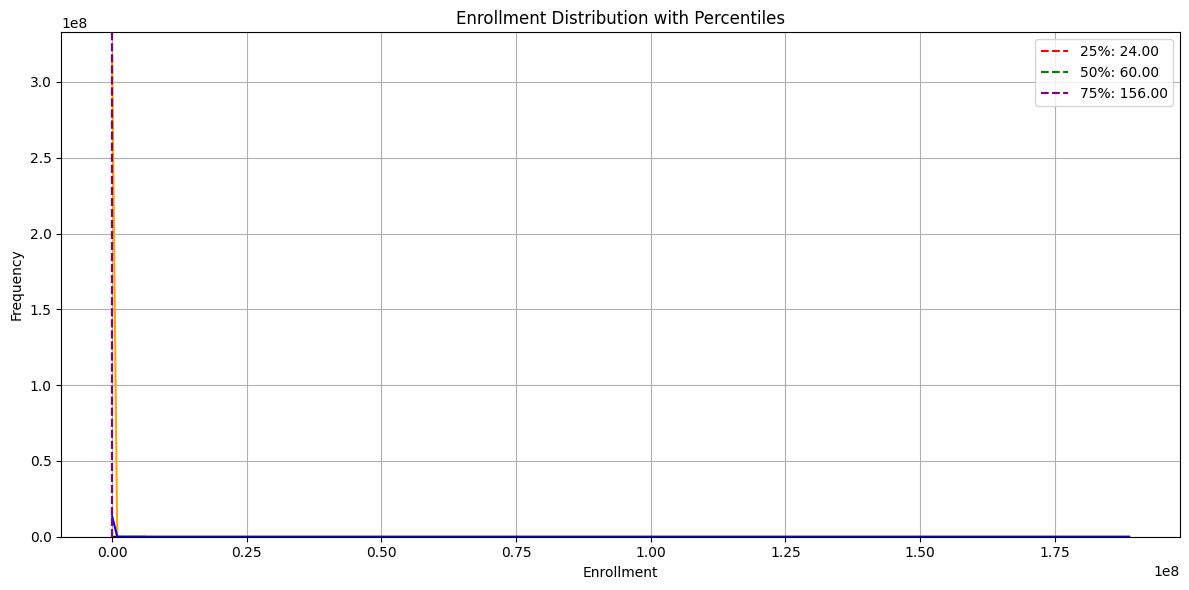

Plotting for column: result_group_id


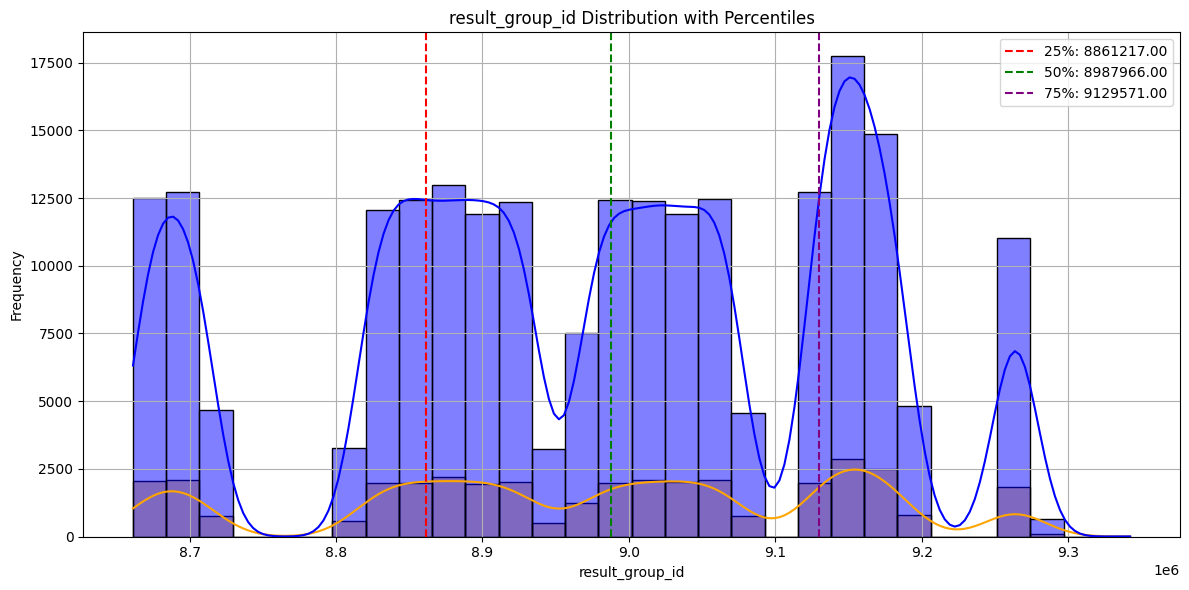

Plotting for column: count


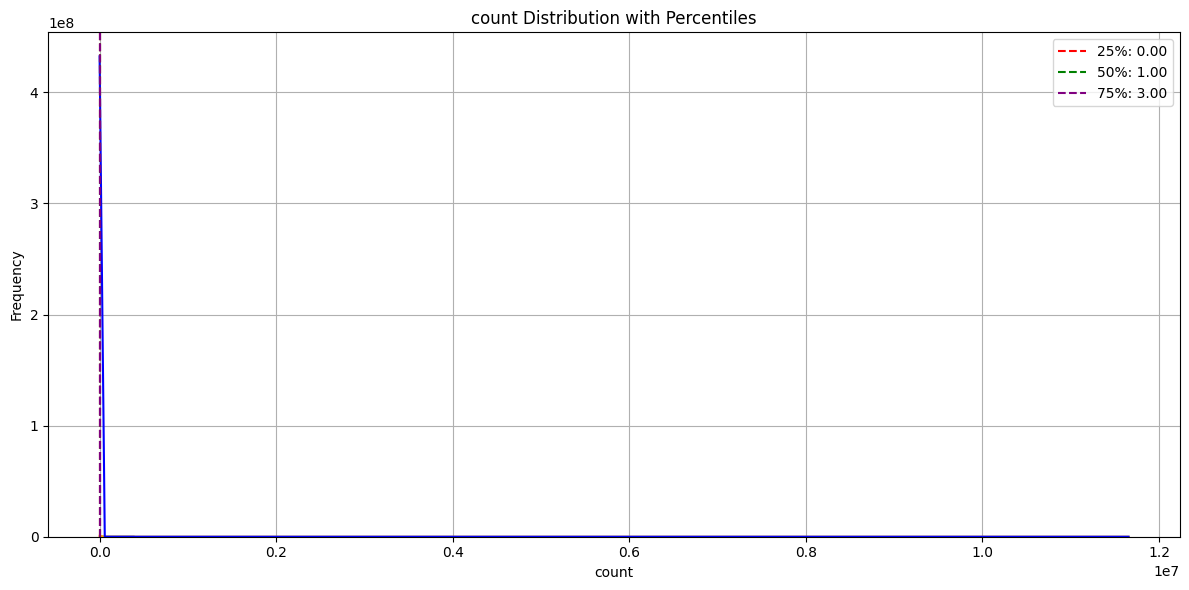

Plotting for column: subjects_affected


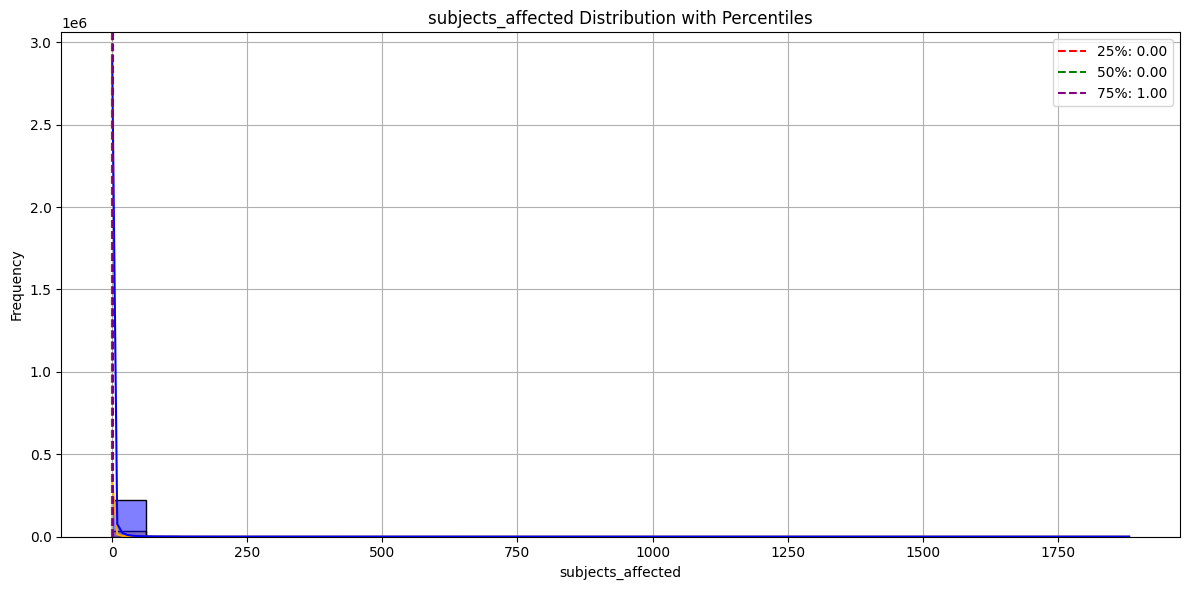

Plotting for column: subjects_at_risk


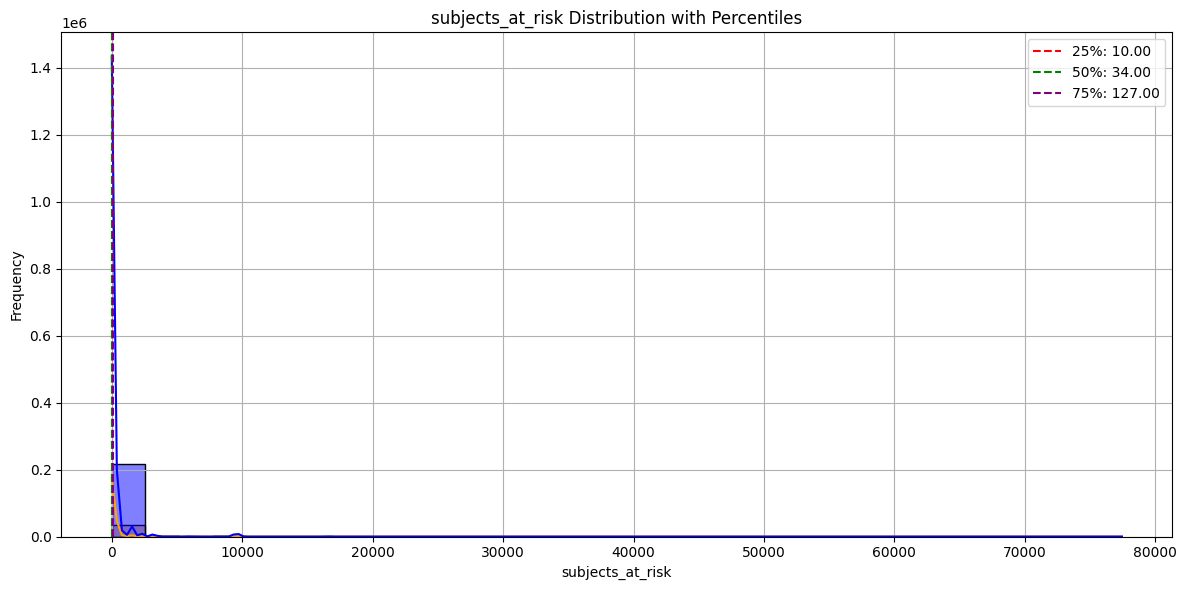

Plotting for column: event_count


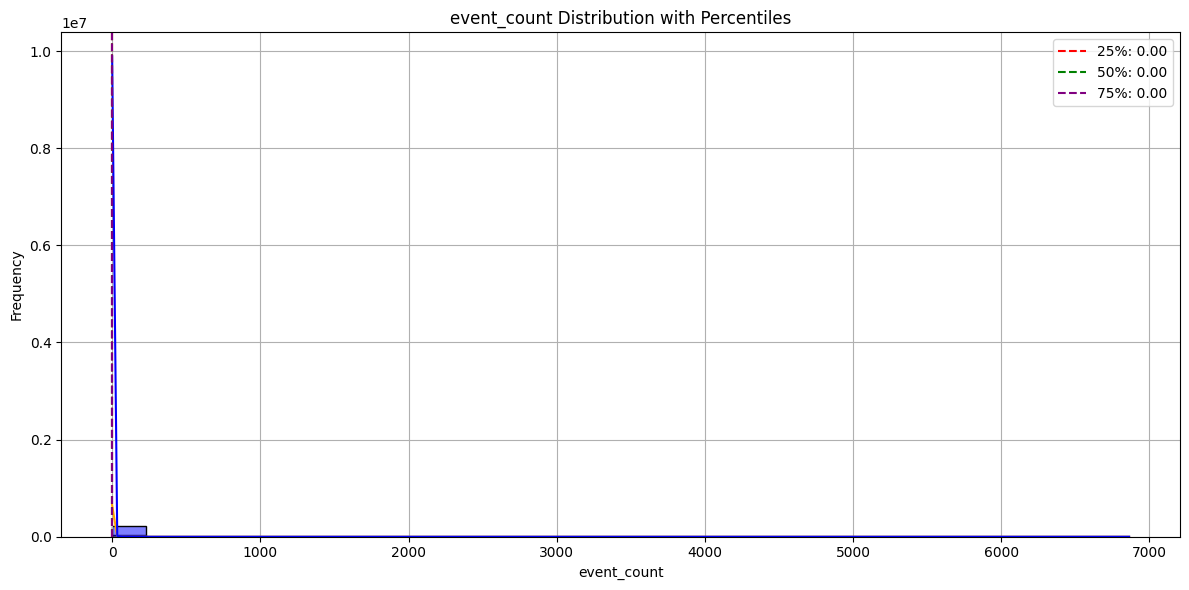

Plotting for column: frequency_threshold


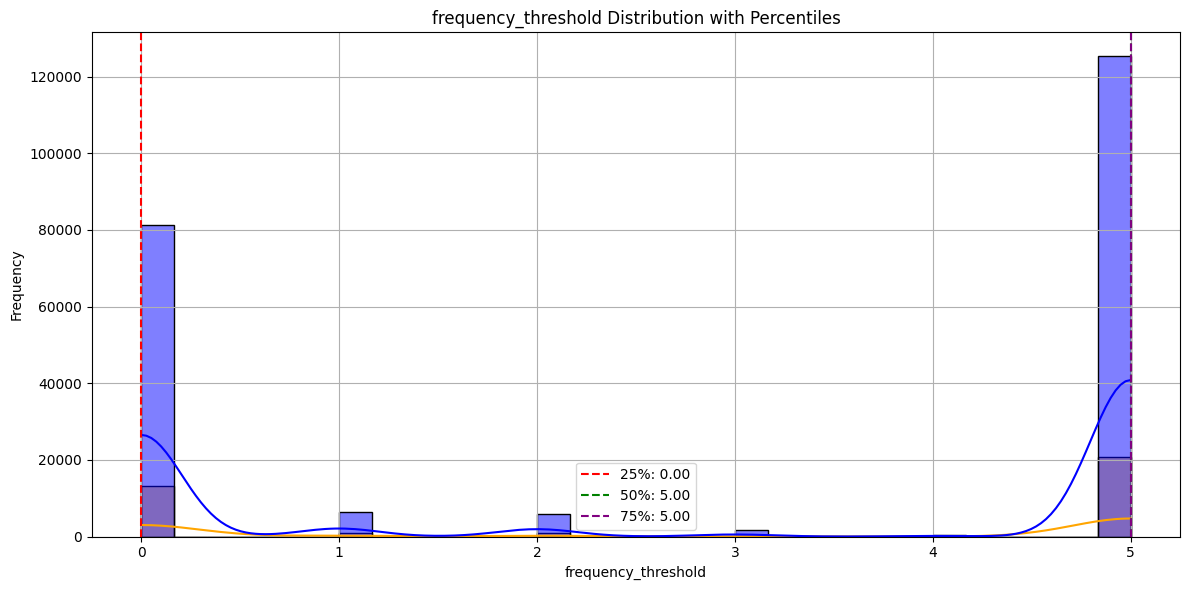

Plotting for column: minimum_age


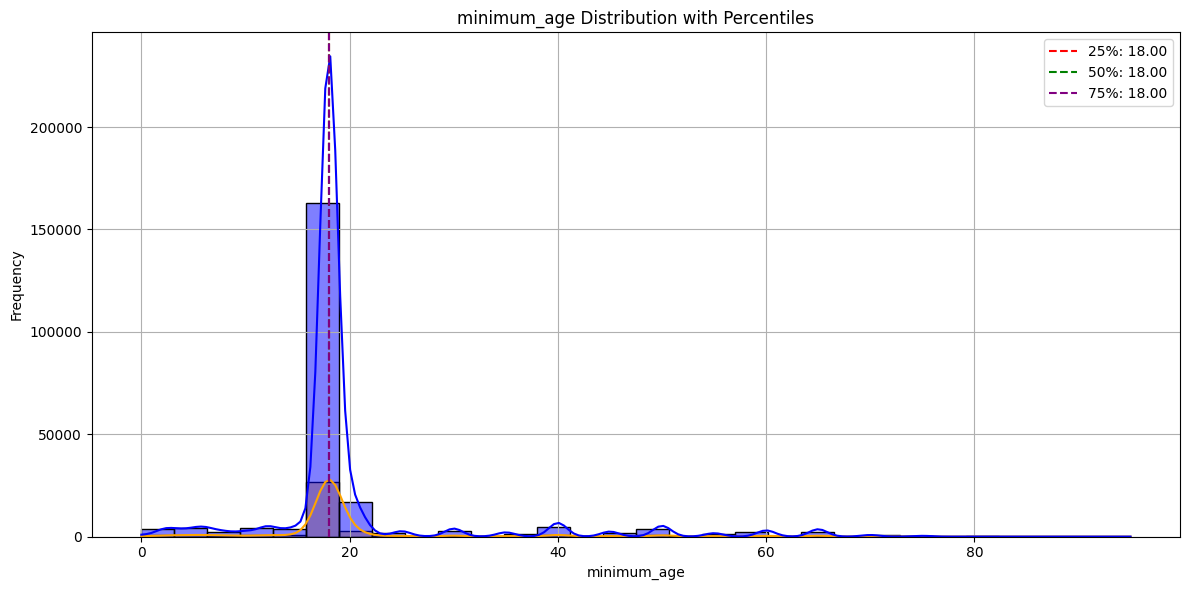

Plotting for column: maximum_age


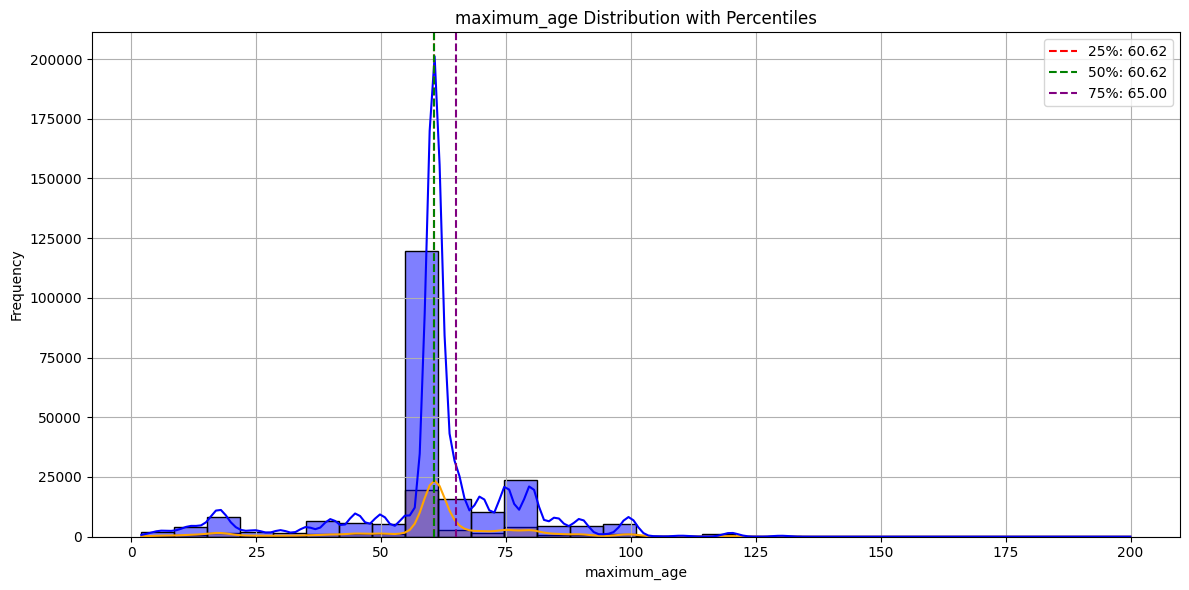

Plotting for column: adult


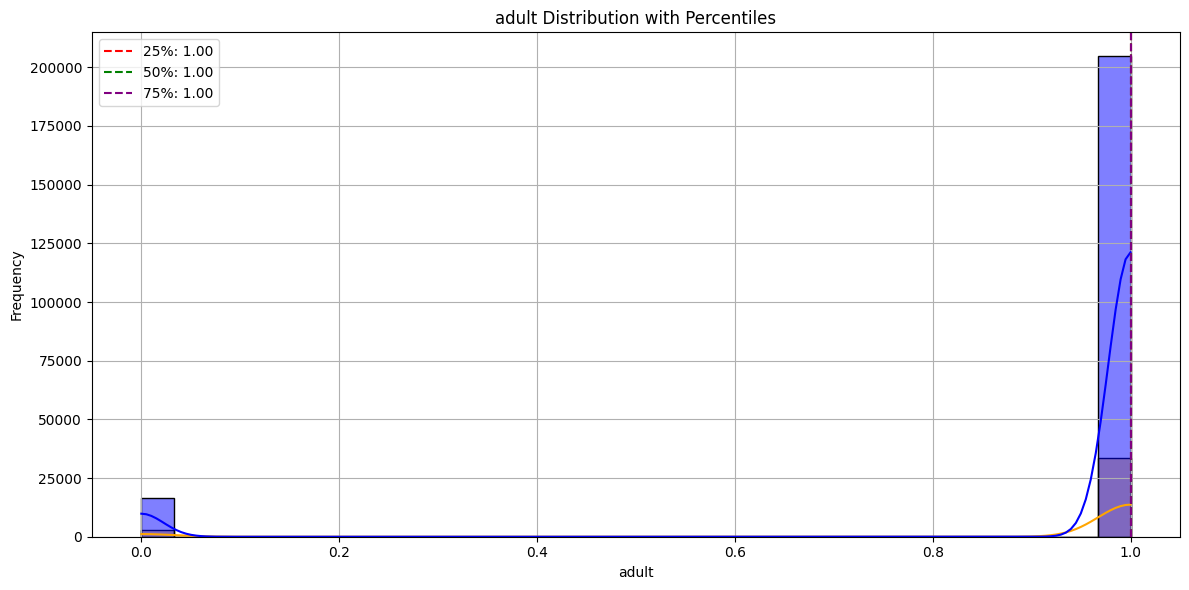

Plotting for column: child


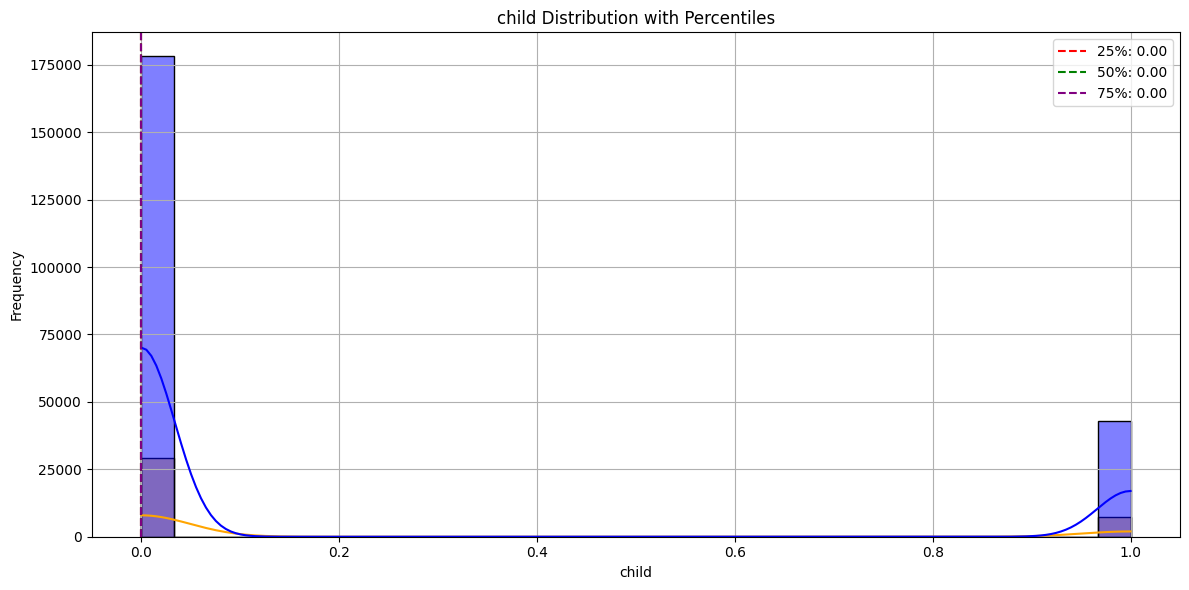

Plotting for column: older_adult


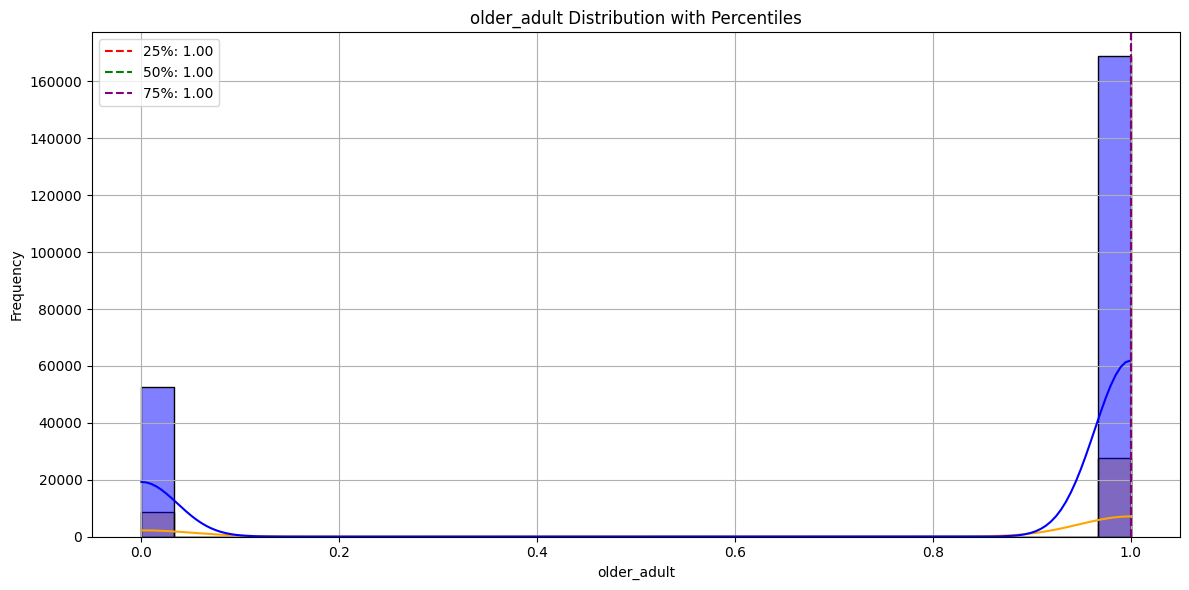

Plotting for column: healthy_volunteers


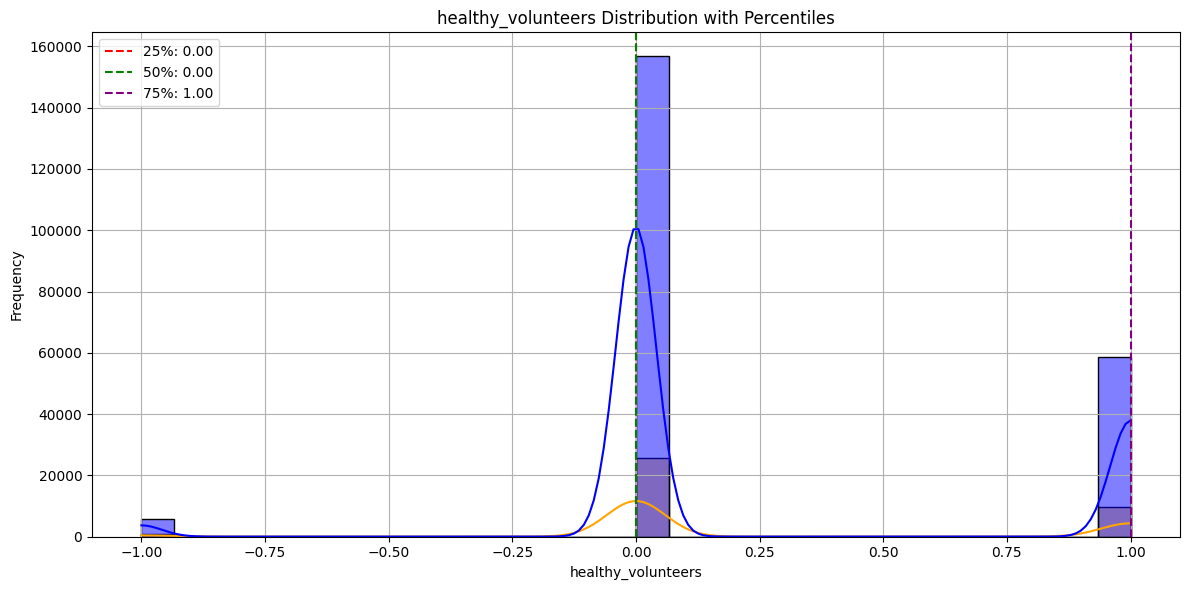

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_with_percentiles(data, column, by_group='trial_status'):
    """
    Plot histogram with 25th, 50th, and 75th percentiles for each column.
    
    Parameters:
    - data: The dataset.
    - column: The column to visualize.
    - by_group: The grouping column (default: 'trial_status').
    """
    plt.figure(figsize=(12, 6))
    
    percentiles = data[column].quantile([0.25, 0.5, 0.75])
    
    sns.histplot(data=data, x=column, hue=by_group, kde=True, bins=30,
                 palette={'Completed': 'blue', 'Not Completed': 'orange'})
    plt.title(f'{column} Distribution with Percentiles')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    for perc, color, label in zip(percentiles, ['red', 'green', 'purple'], ['25%', '50%', '75%']):
        plt.axvline(x=perc, color=color, linestyle='--', linewidth=1.5, label=f'{label}: {perc:.2f}')
    
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

columns_to_analyze = ['Enrollment','result_group_id','count','subjects_affected','subjects_at_risk','event_count','frequency_threshold','minimum_age','maximum_age','adult','child','older_adult','healthy_volunteers'] 

for col in columns_to_analyze:
    if col in data.columns:
        print(f"Plotting for column: {col}")
        plot_with_percentiles(data, col)


In [24]:
import pandas as pd
import seaborn as sns

print("Pandas version:", pd.__version__)
print("Seaborn version:", sns.__version__)


Pandas version: 2.2.3
Seaborn version: 0.13.2


EDA

Univariant Analysis

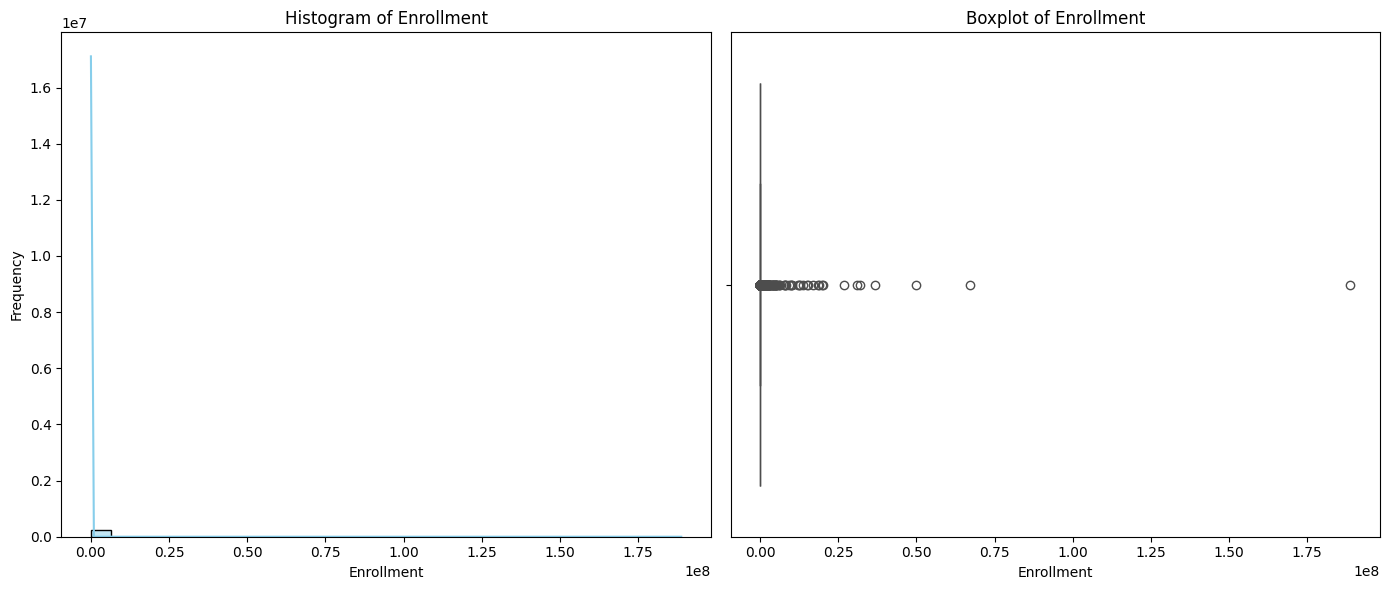

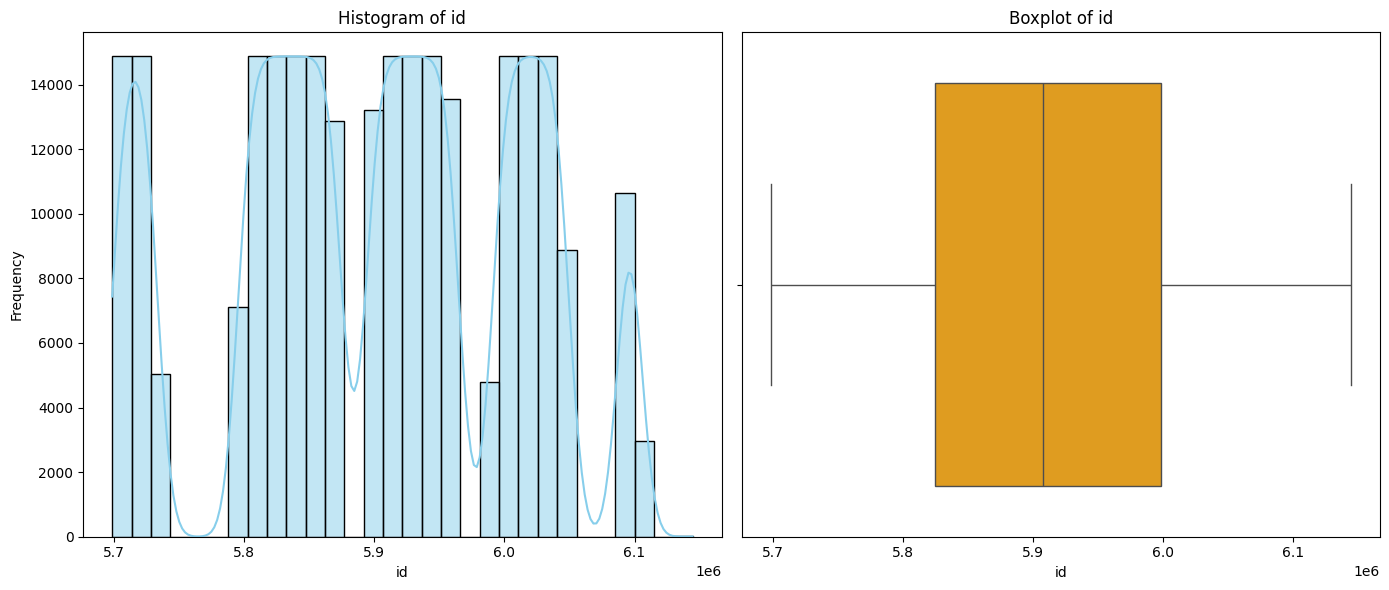

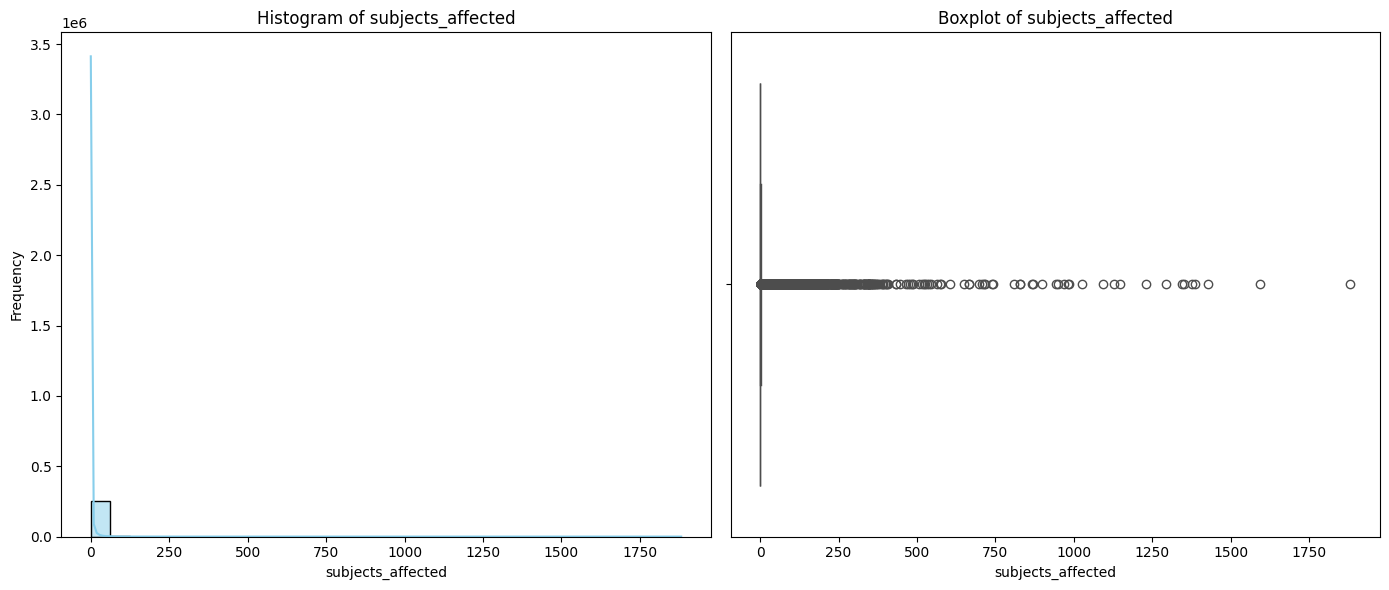

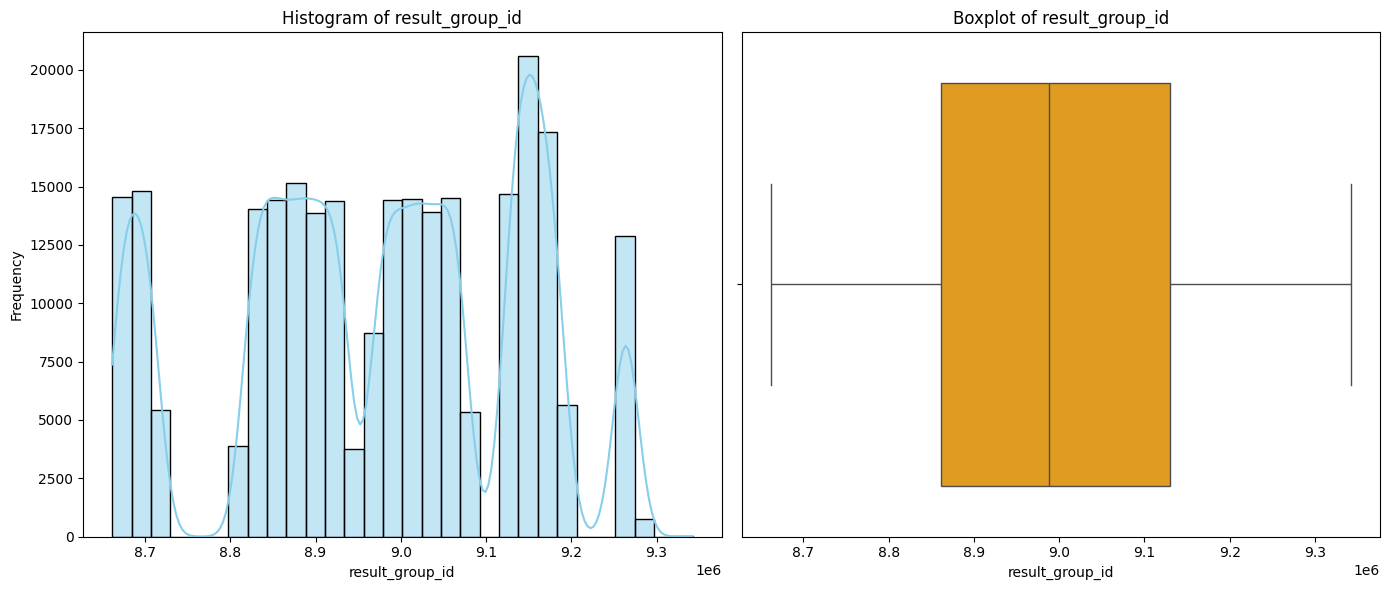

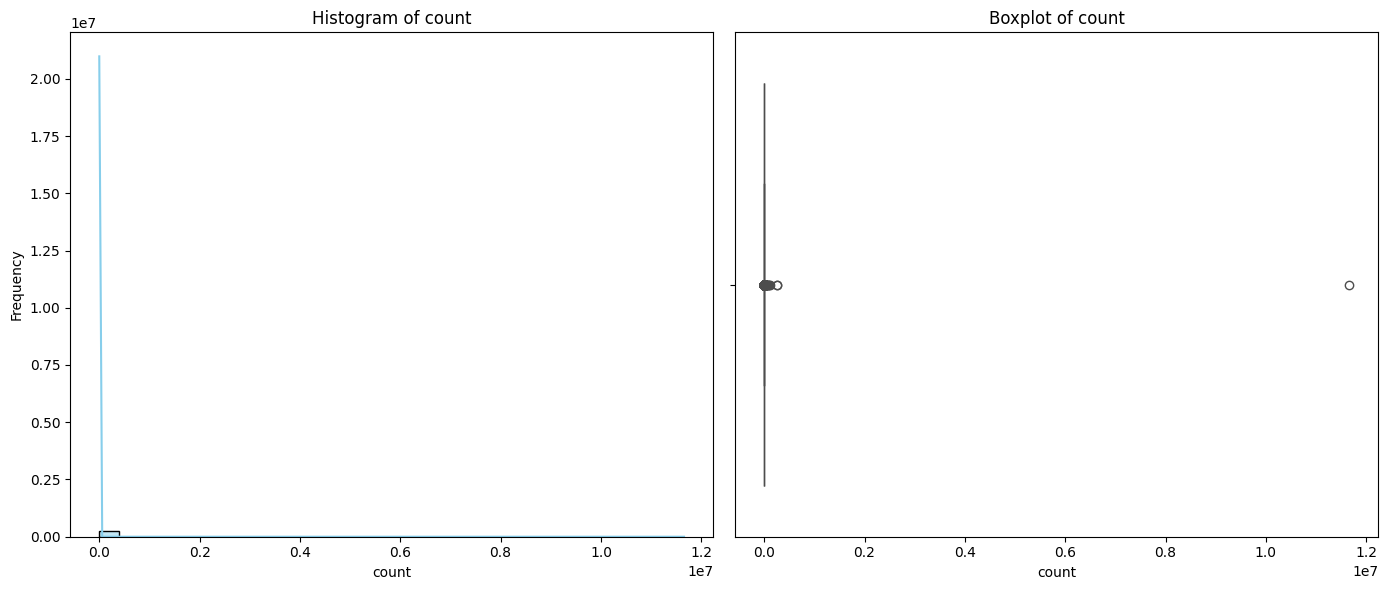

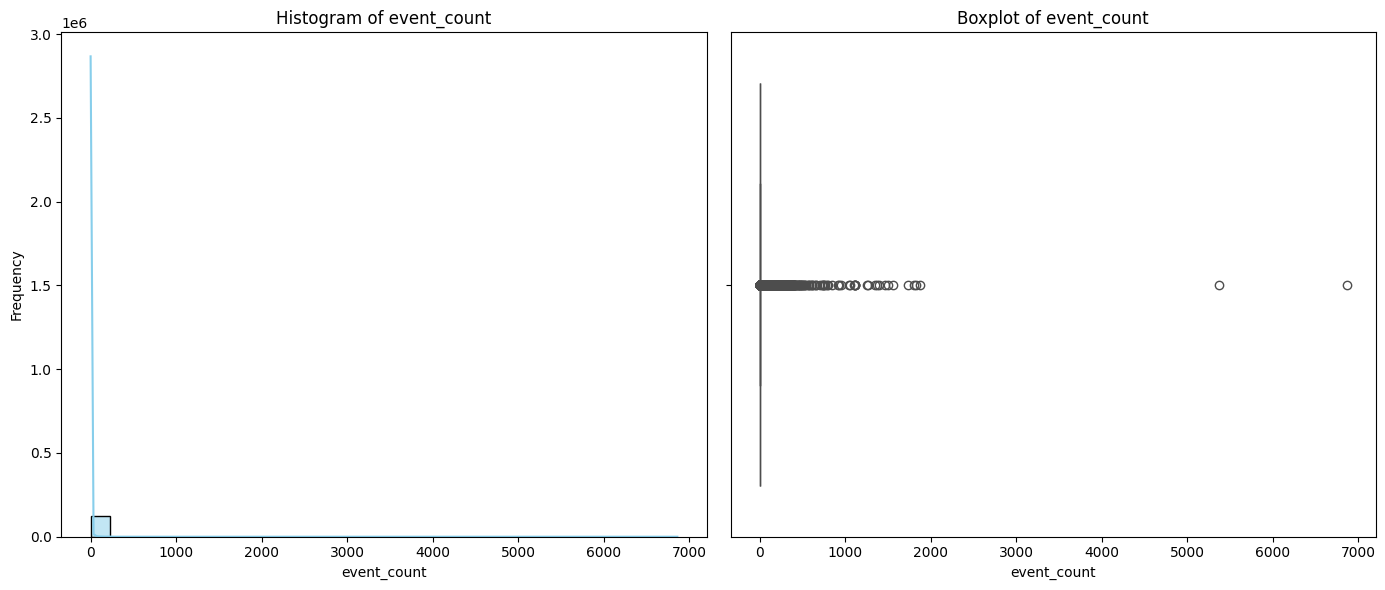

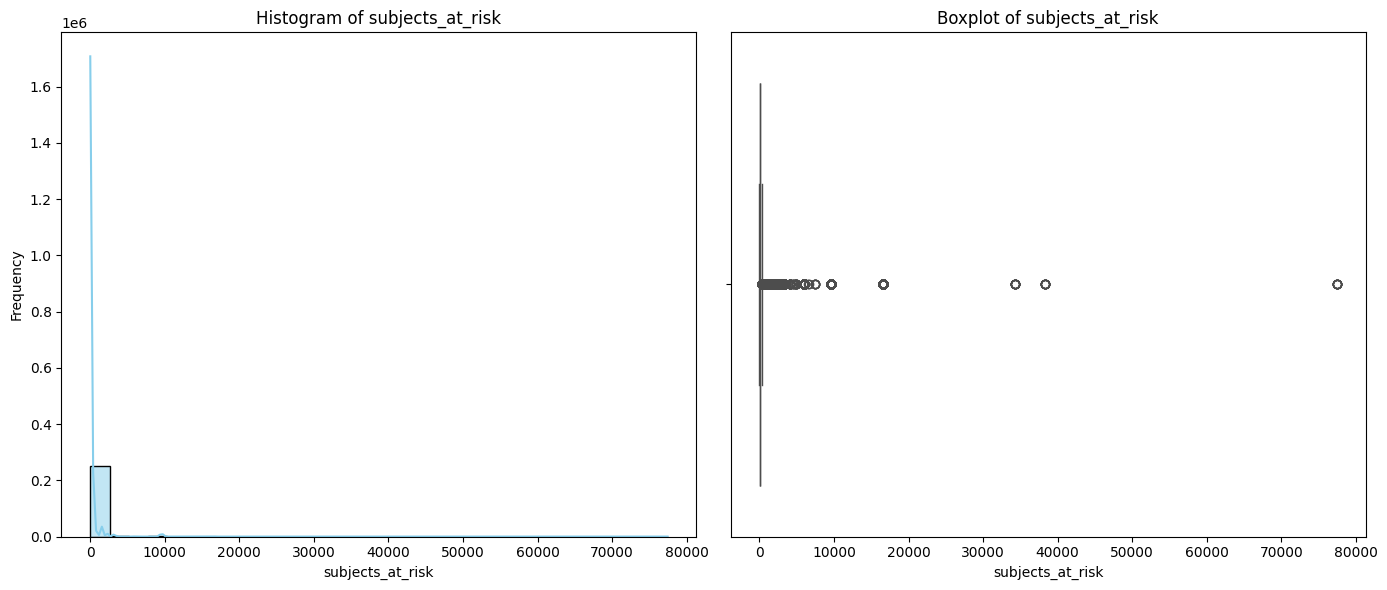

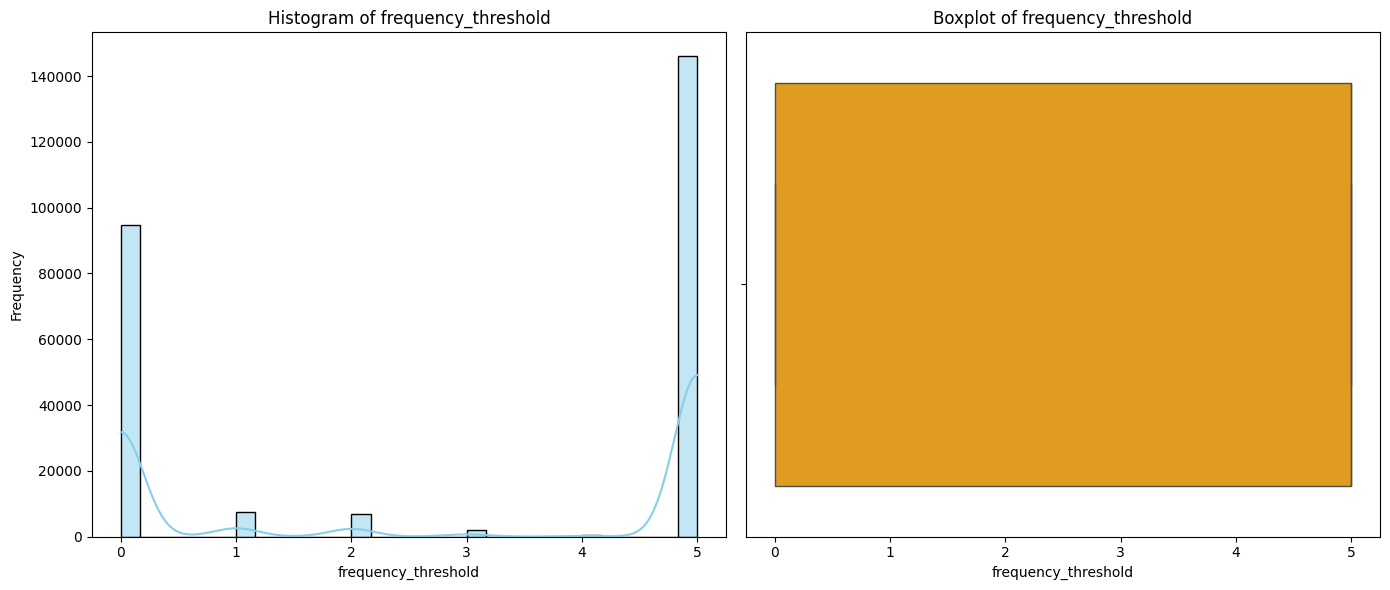

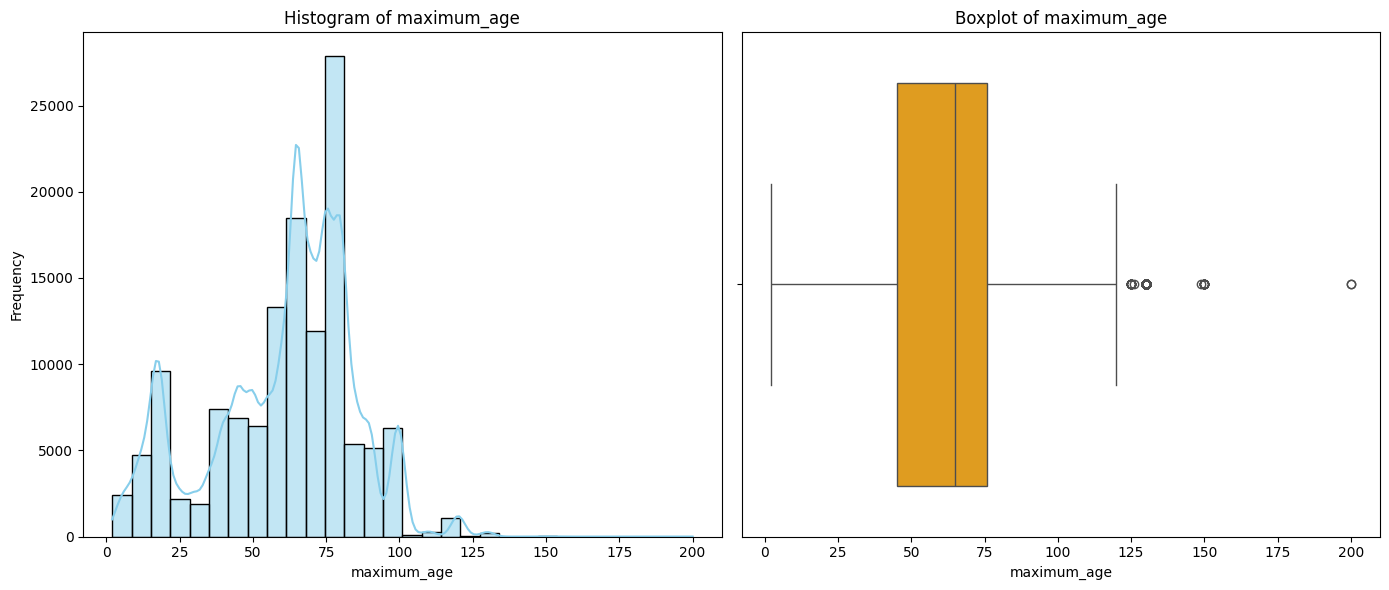

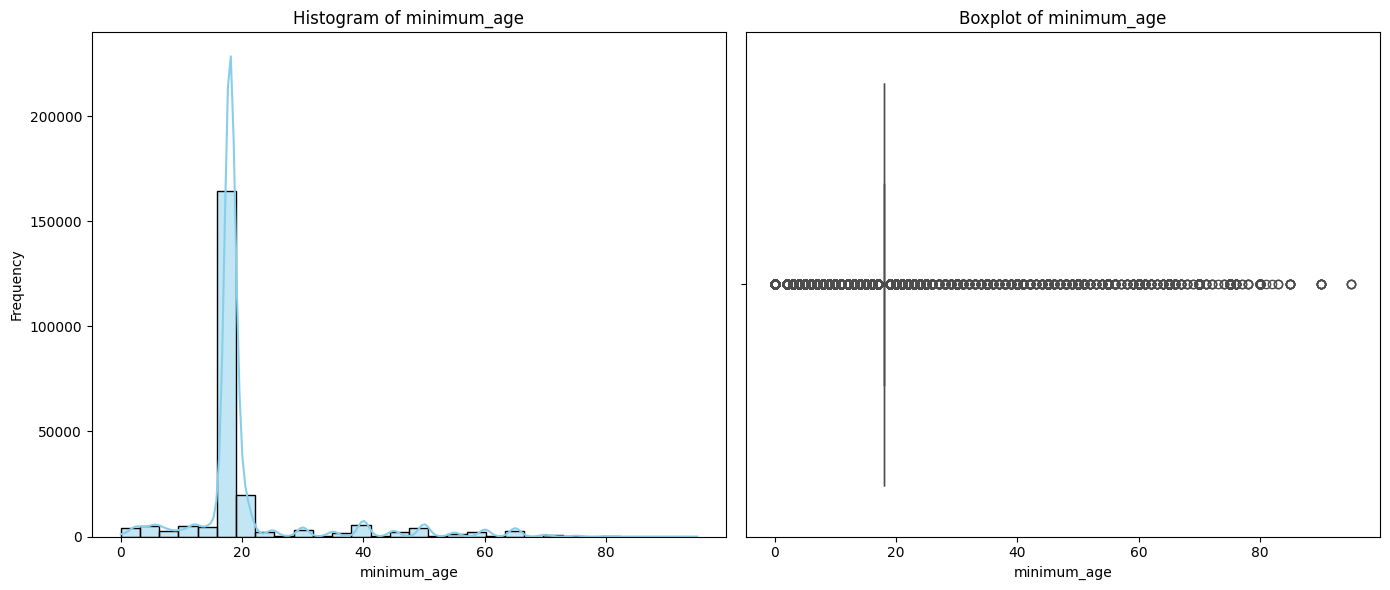

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

continuous_columns = ['Enrollment','id','subjects_affected', 'result_group_id', 'count', 'event_count','subjects_at_risk', 'frequency_threshold',
                      'maximum_age','minimum_age']

for col in continuous_columns:
    plt.figure(figsize=(14, 6))
    
    plt.subplot(1, 2, 1)
    sns.histplot(data[col].dropna(), kde=True, bins=30, color='skyblue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col], color='orange')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    
    plt.tight_layout()
    plt.show()


In [15]:
data = data.drop(columns=['log_event_count'])


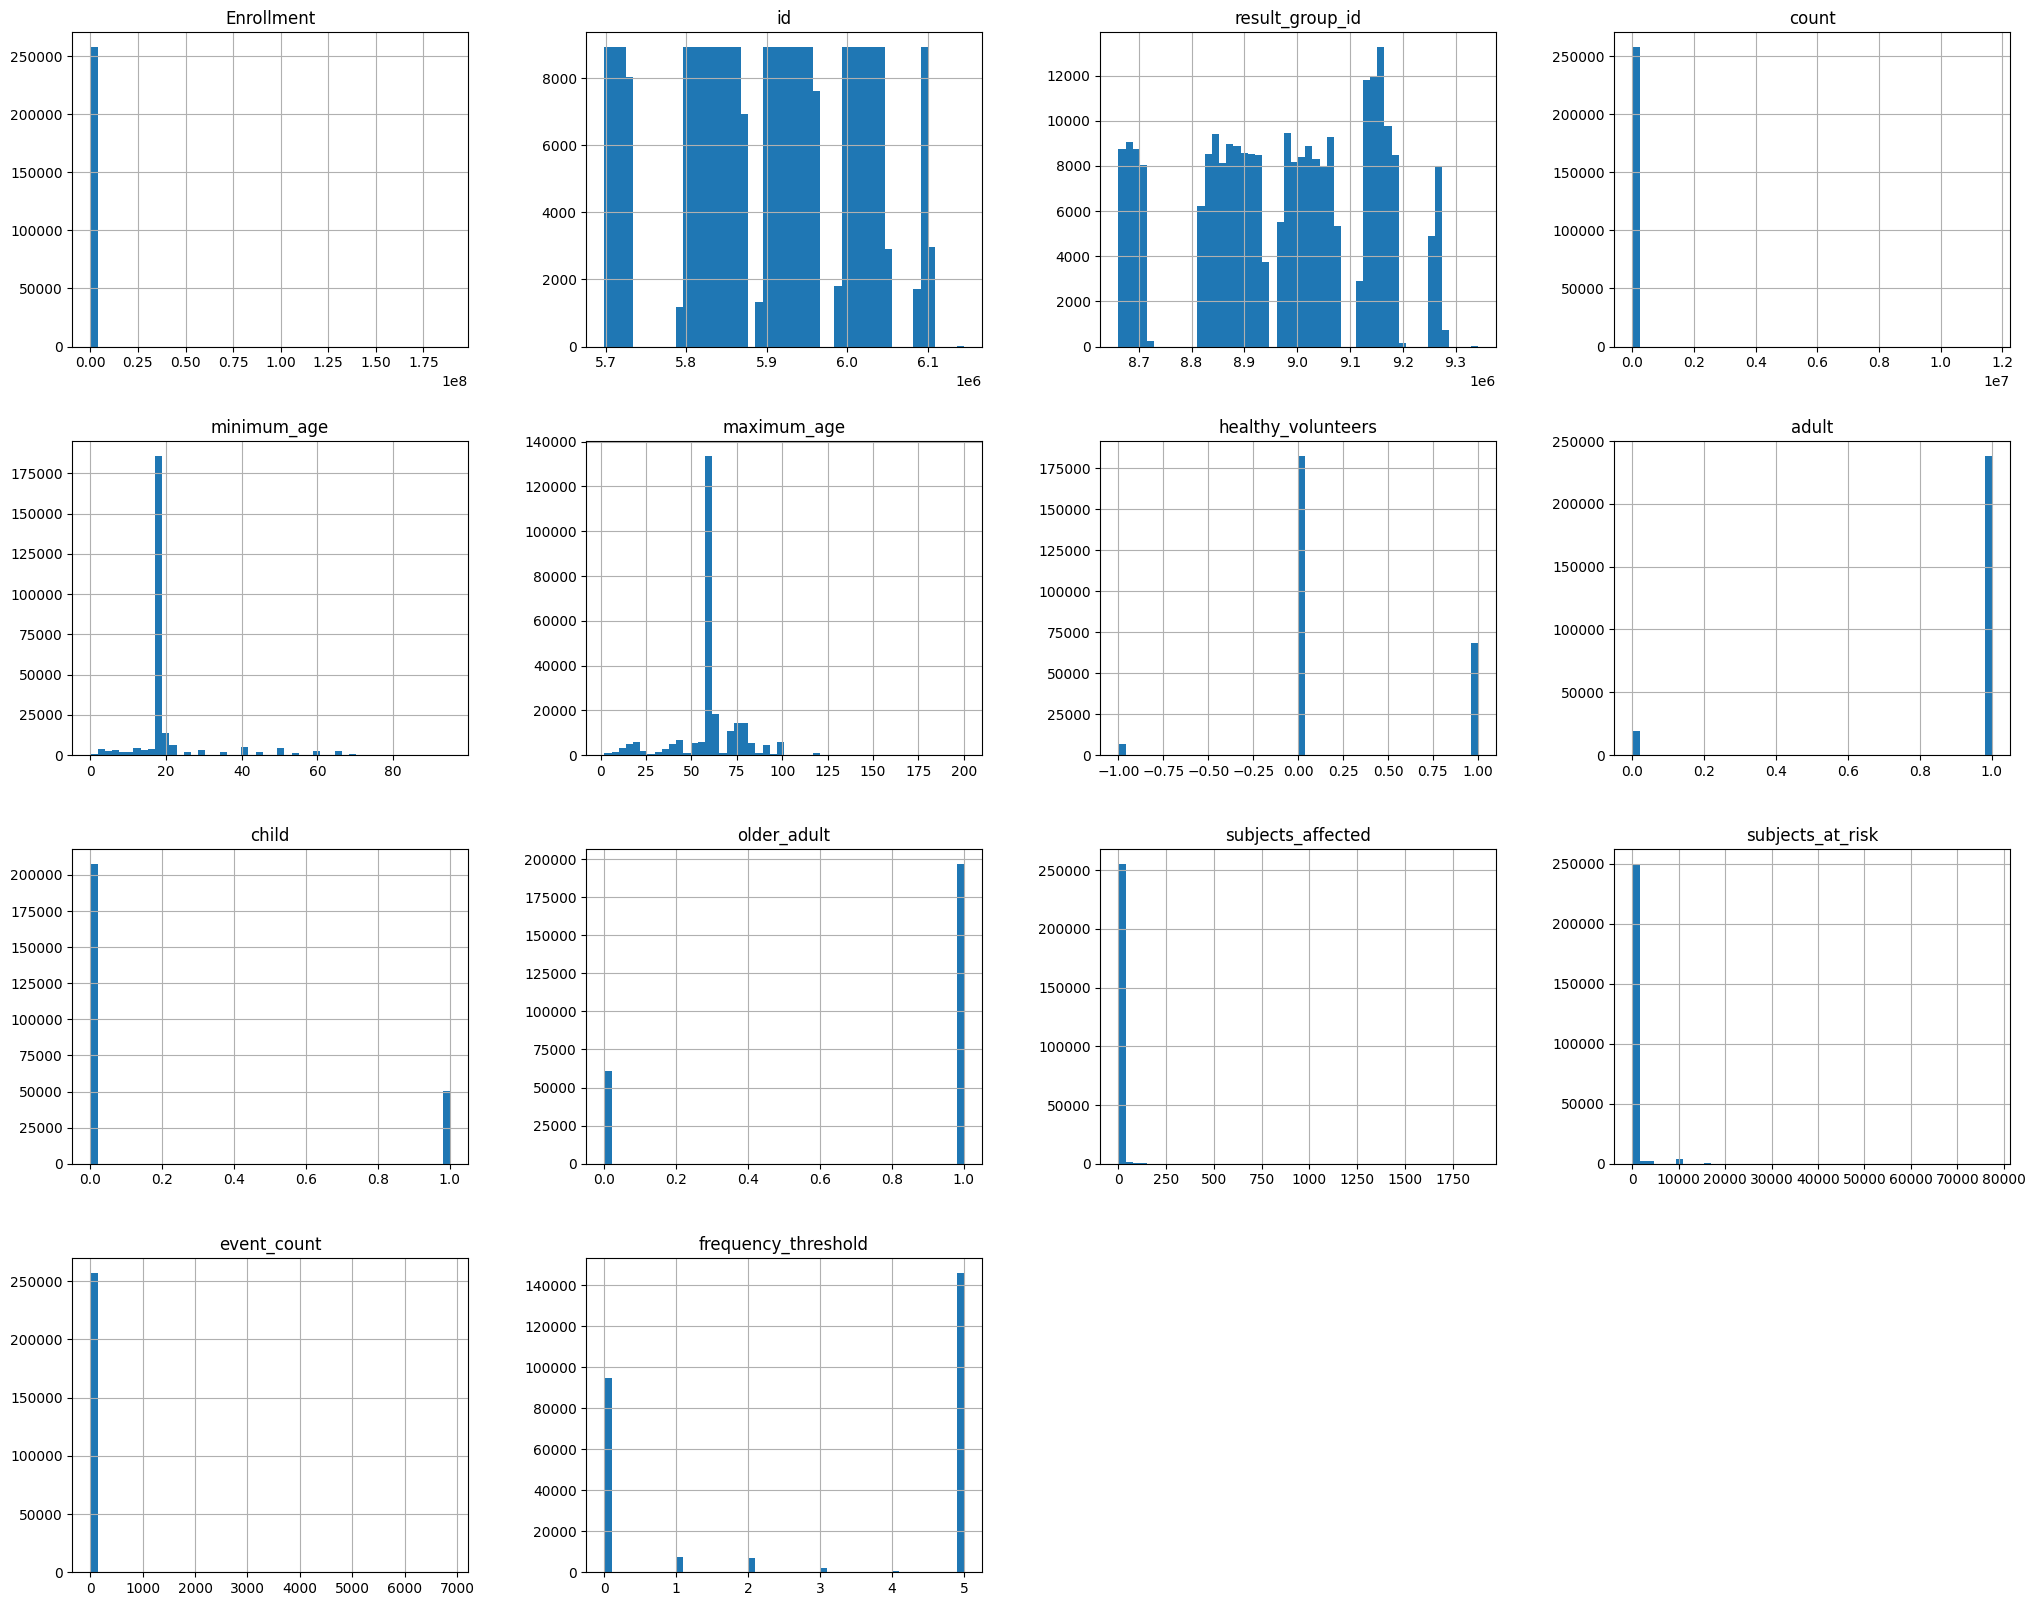

In [18]:
data.hist(bins=50, figsize=(25,20))
plt.show()

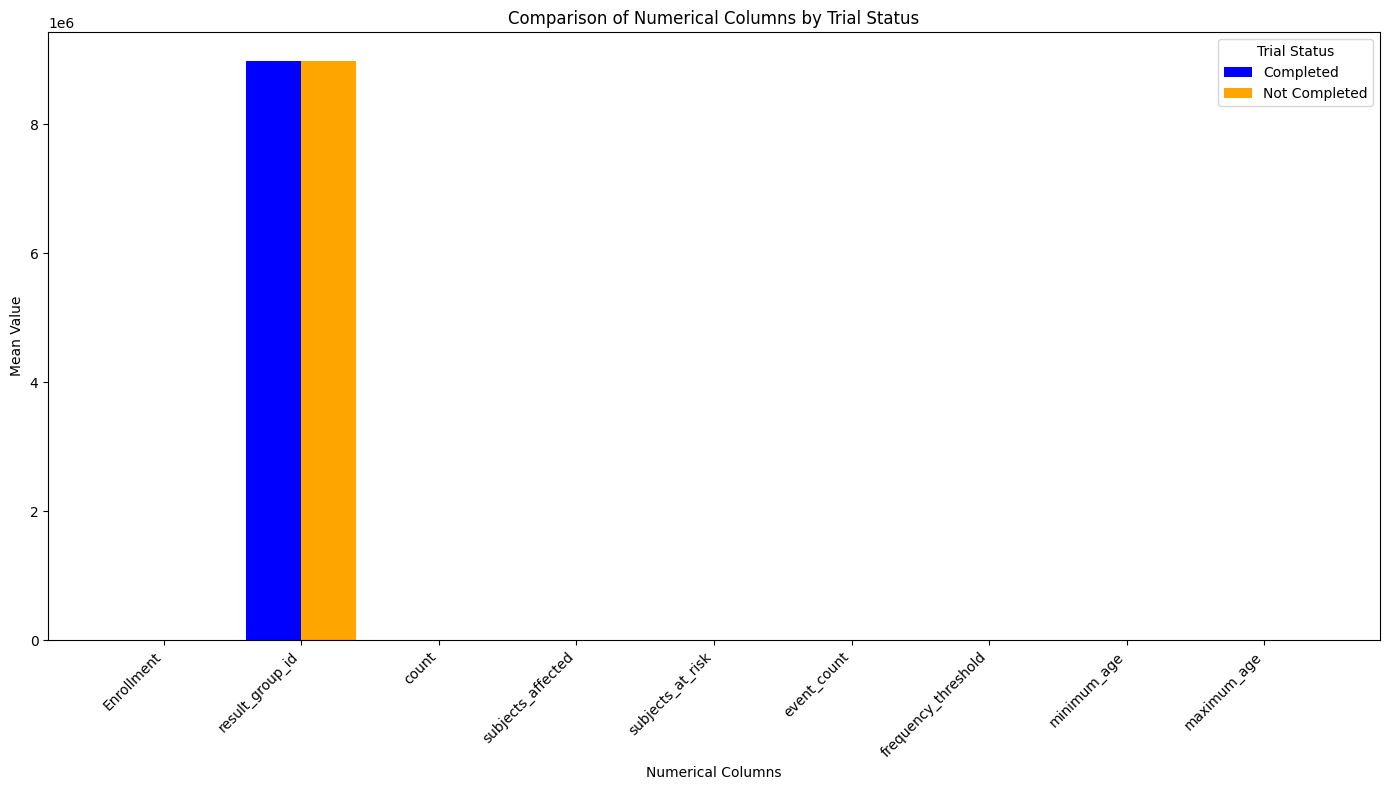

In [47]:
import matplotlib.pyplot as plt
import numpy as np

numerical_columns = ['Enrollment', 'result_group_id', 'count', 
                     'subjects_affected', 'subjects_at_risk', 'event_count', 
                     'frequency_threshold', 'minimum_age', 'maximum_age']

completed_means = []
not_completed_means = []

for col in numerical_columns:
    completed_means.append(data[data['trial_status'] == 'Completed'][col].mean())
    not_completed_means.append(data[data['trial_status'] == 'Not Completed'][col].mean())

x = np.arange(len(numerical_columns)) 
bar_width = 0.4  

plt.figure(figsize=(14, 8))

plt.bar(x - bar_width/2, completed_means, width=bar_width, label='Completed', color='blue')
plt.bar(x + bar_width/2, not_completed_means, width=bar_width, label='Not Completed', color='orange')

plt.xticks(x, numerical_columns, rotation=45, ha='right')
plt.xlabel('Numerical Columns')
plt.ylabel('Mean Value')
plt.title('Comparison of Numerical Columns by Trial Status')
plt.legend(title='Trial Status')

plt.tight_layout()
plt.show()


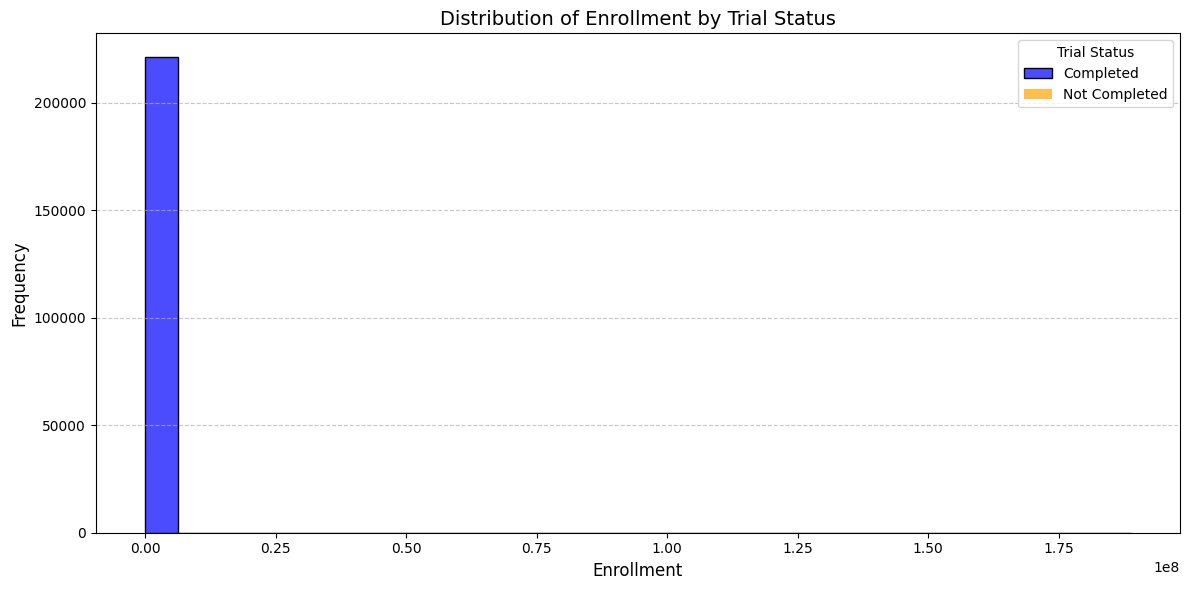

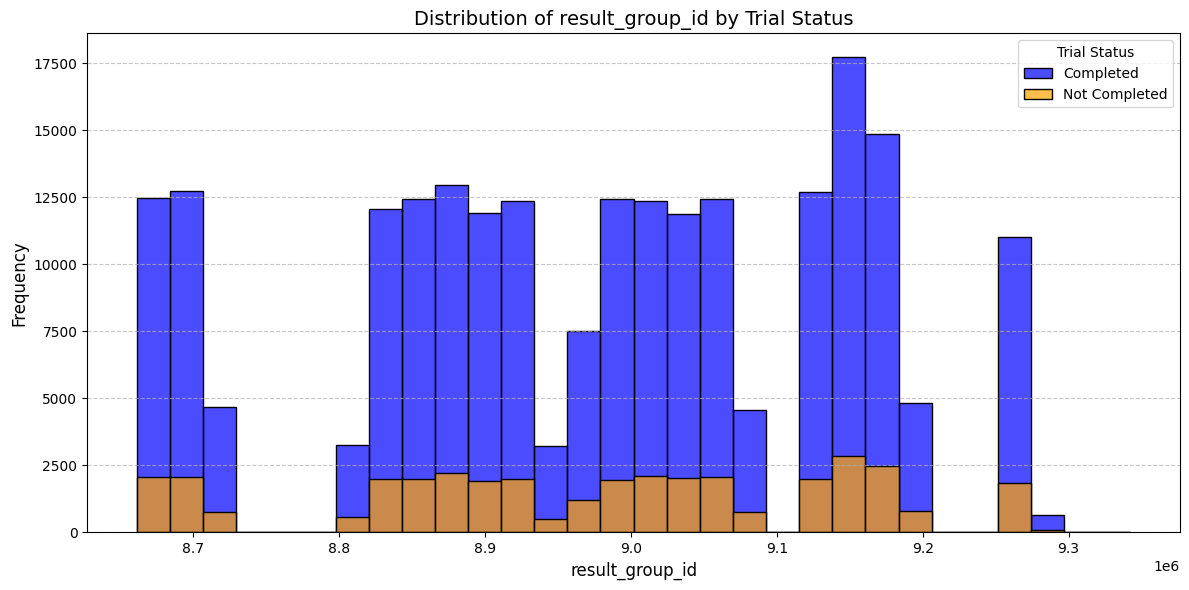

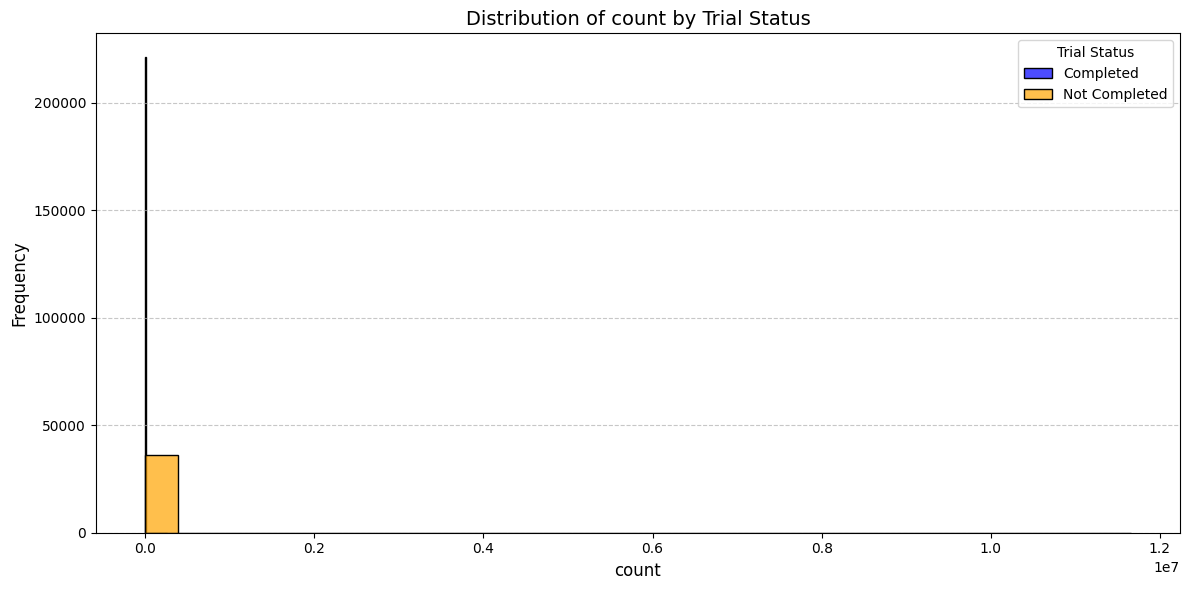

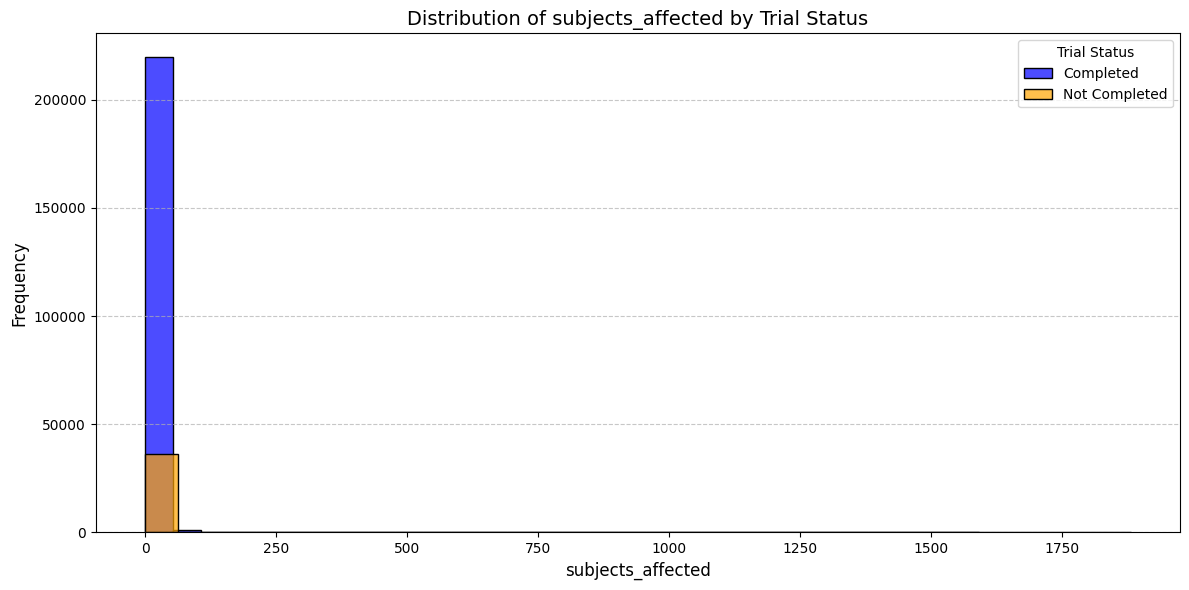

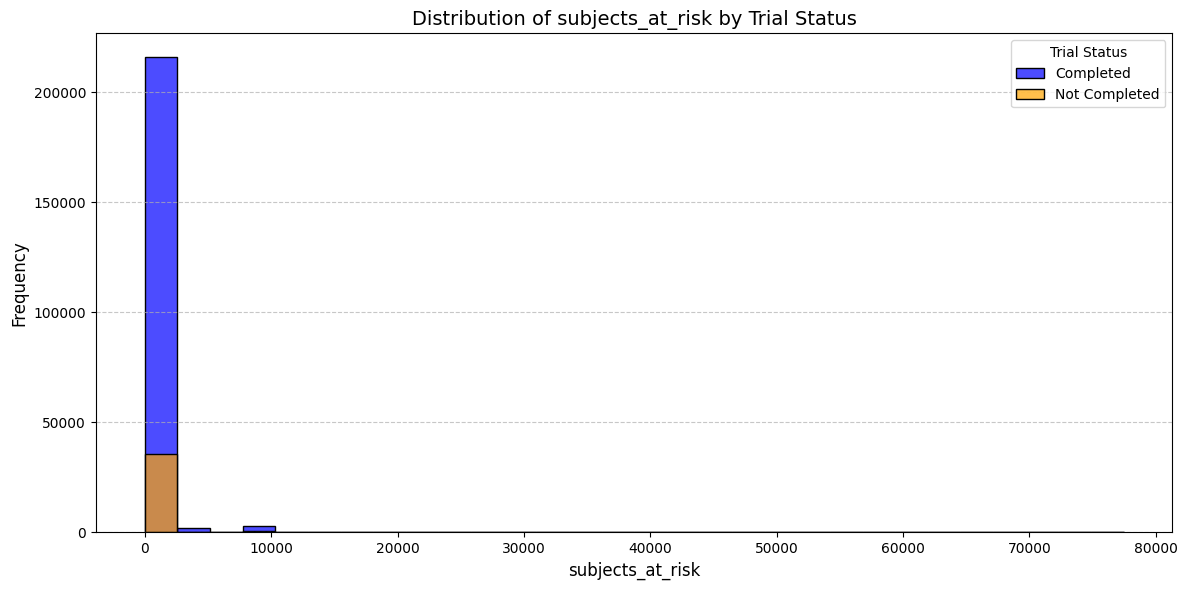

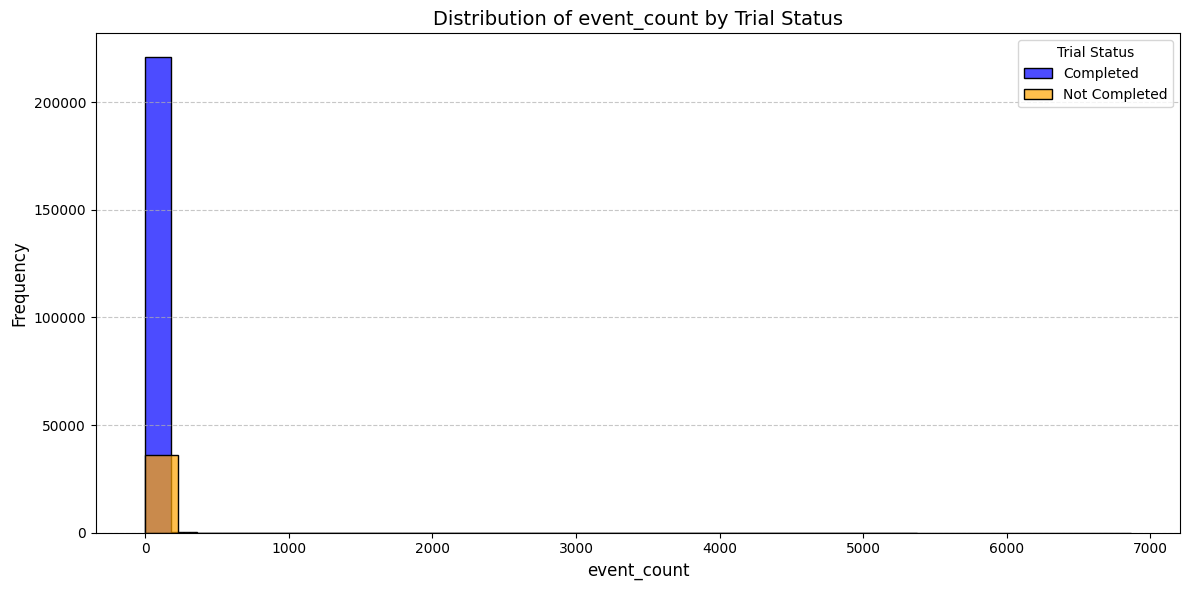

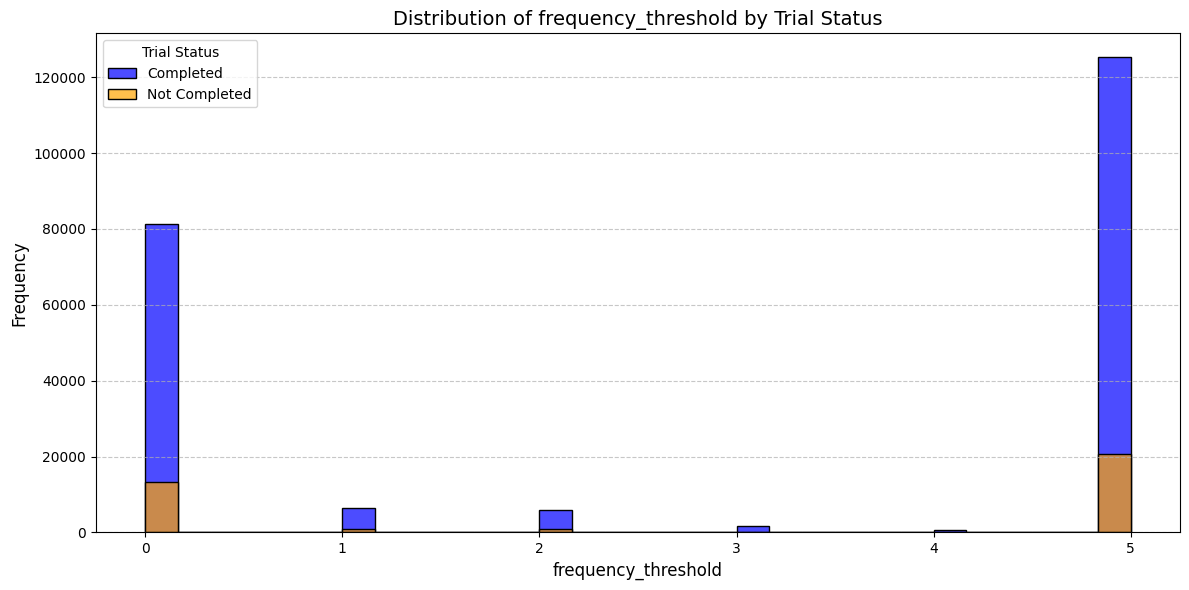

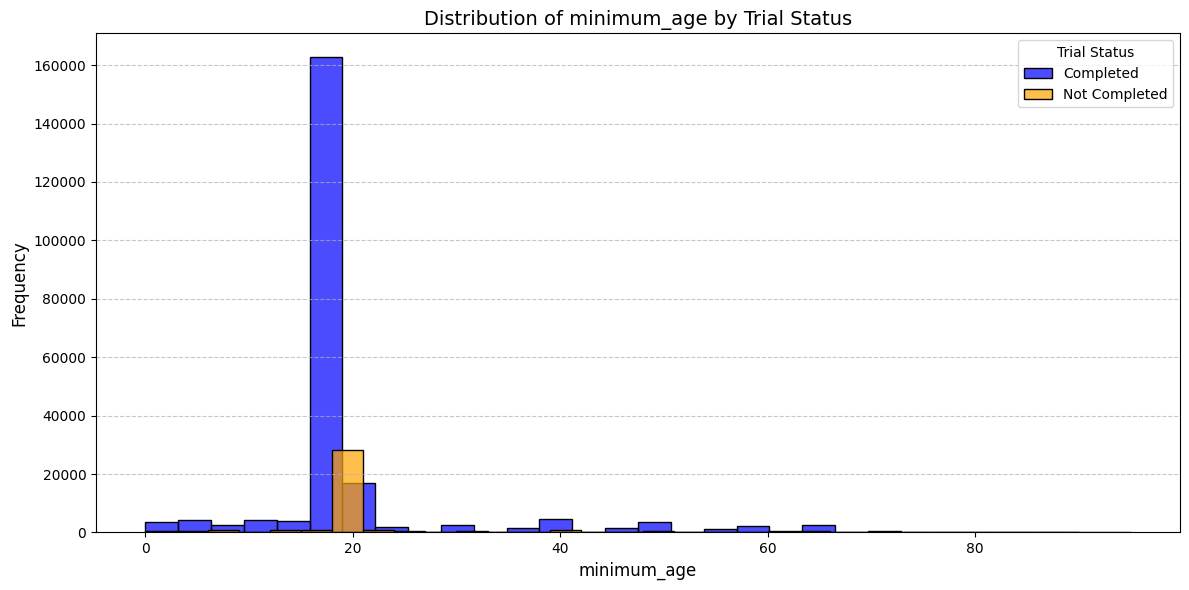

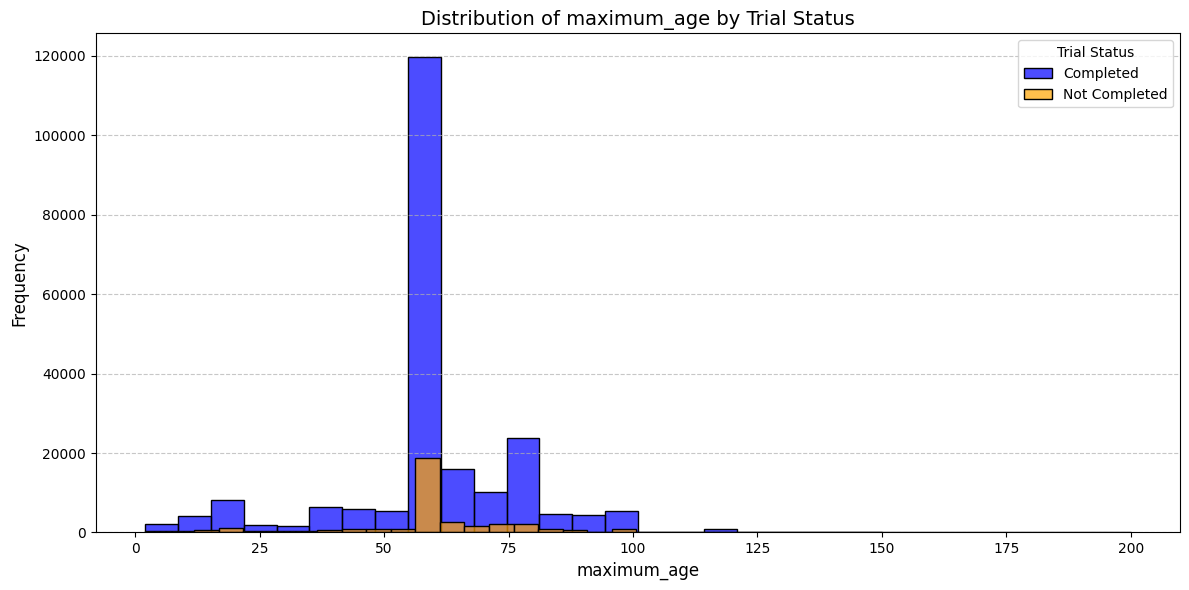

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_columns = [
    'Enrollment', 'result_group_id', 'count', 'subjects_affected',
    'subjects_at_risk', 'event_count', 'frequency_threshold', 'minimum_age', 'maximum_age'
]

for col in numerical_columns:
    plt.figure(figsize=(12, 6))
    
    sns.histplot(
        data=data[data['trial_status'] == 'Completed'], 
        x=col, 
        color='blue', 
        label='Completed', 
        kde=False, 
        bins=30, 
        alpha=0.7
    )
    
    sns.histplot(
        data=data[data['trial_status'] == 'Not Completed'], 
        x=col, 
        color='orange', 
        label='Not Completed', 
        kde=False, 
        bins=30, 
        alpha=0.7
    )
    
    plt.title(f'Distribution of {col} by Trial Status', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.legend(title='Trial Status')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    
    plt.show()


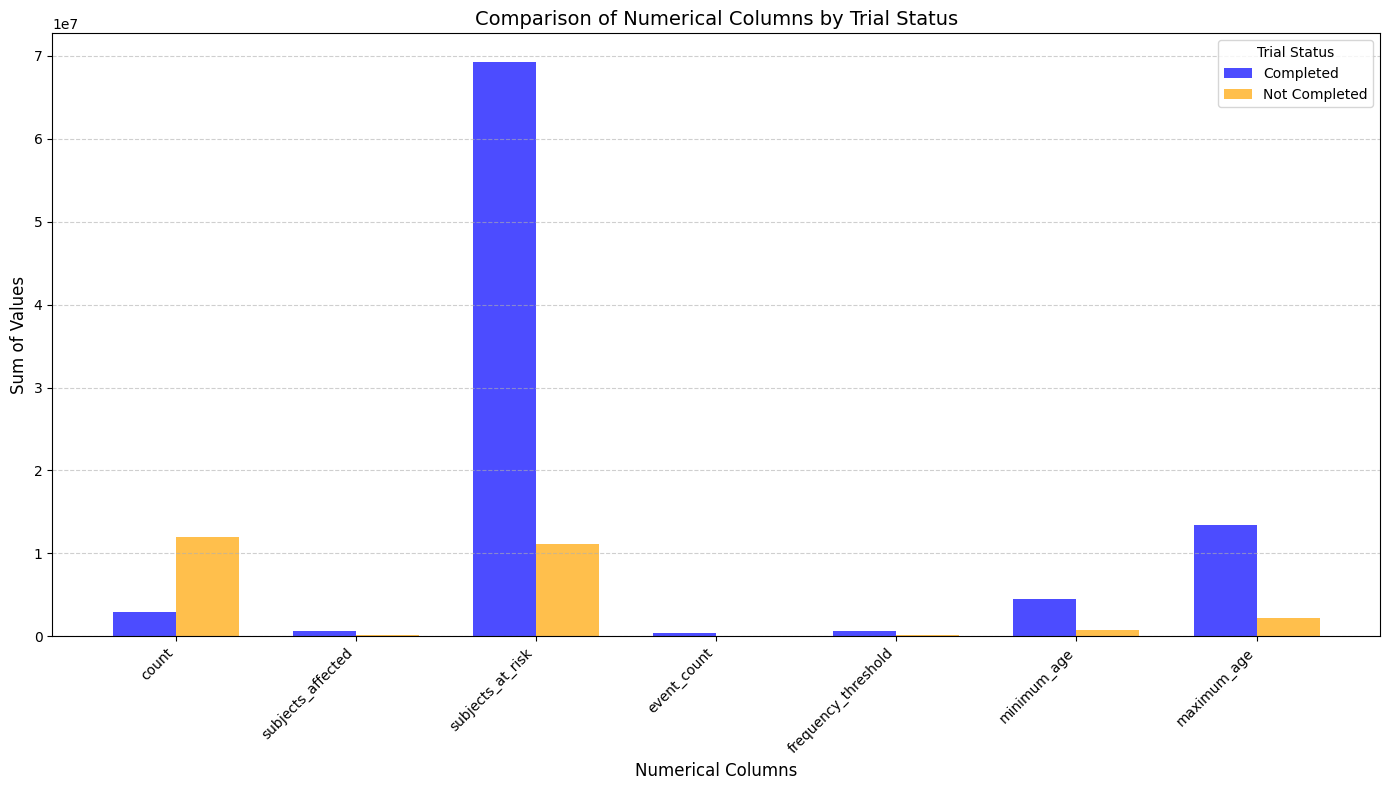

In [49]:
import matplotlib.pyplot as plt
import numpy as np

numerical_columns = [
    'count', 'subjects_affected',
    'subjects_at_risk', 'event_count', 'frequency_threshold', 'minimum_age', 'maximum_age'
]

completed_counts = []
not_completed_counts = []

for col in numerical_columns:
    completed_counts.append(data[data['trial_status'] == 'Completed'][col].dropna().sum())
    not_completed_counts.append(data[data['trial_status'] == 'Not Completed'][col].dropna().sum())

bar_width = 0.35
x = np.arange(len(numerical_columns))

plt.figure(figsize=(14, 8))

plt.bar(x - bar_width/2, completed_counts, width=bar_width, color='blue', label='Completed', alpha=0.7)

plt.bar(x + bar_width/2, not_completed_counts, width=bar_width, color='orange', label='Not Completed', alpha=0.7)

plt.xticks(x, numerical_columns, rotation=45, ha='right', fontsize=10)
plt.xlabel('Numerical Columns', fontsize=12)
plt.ylabel('Sum of Values', fontsize=12)
plt.title('Comparison of Numerical Columns by Trial Status', fontsize=14)
plt.legend(title='Trial Status', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


Frequency Counts by Trial Status:
count: Completed = 221243, Not Completed = 36334
subjects_affected: Completed = 221243, Not Completed = 36334
subjects_at_risk: Completed = 221243, Not Completed = 36334
event_count: Completed = 221243, Not Completed = 36334
frequency_threshold: Completed = 221243, Not Completed = 36334
minimum_age: Completed = 221243, Not Completed = 36334
maximum_age: Completed = 221243, Not Completed = 36334


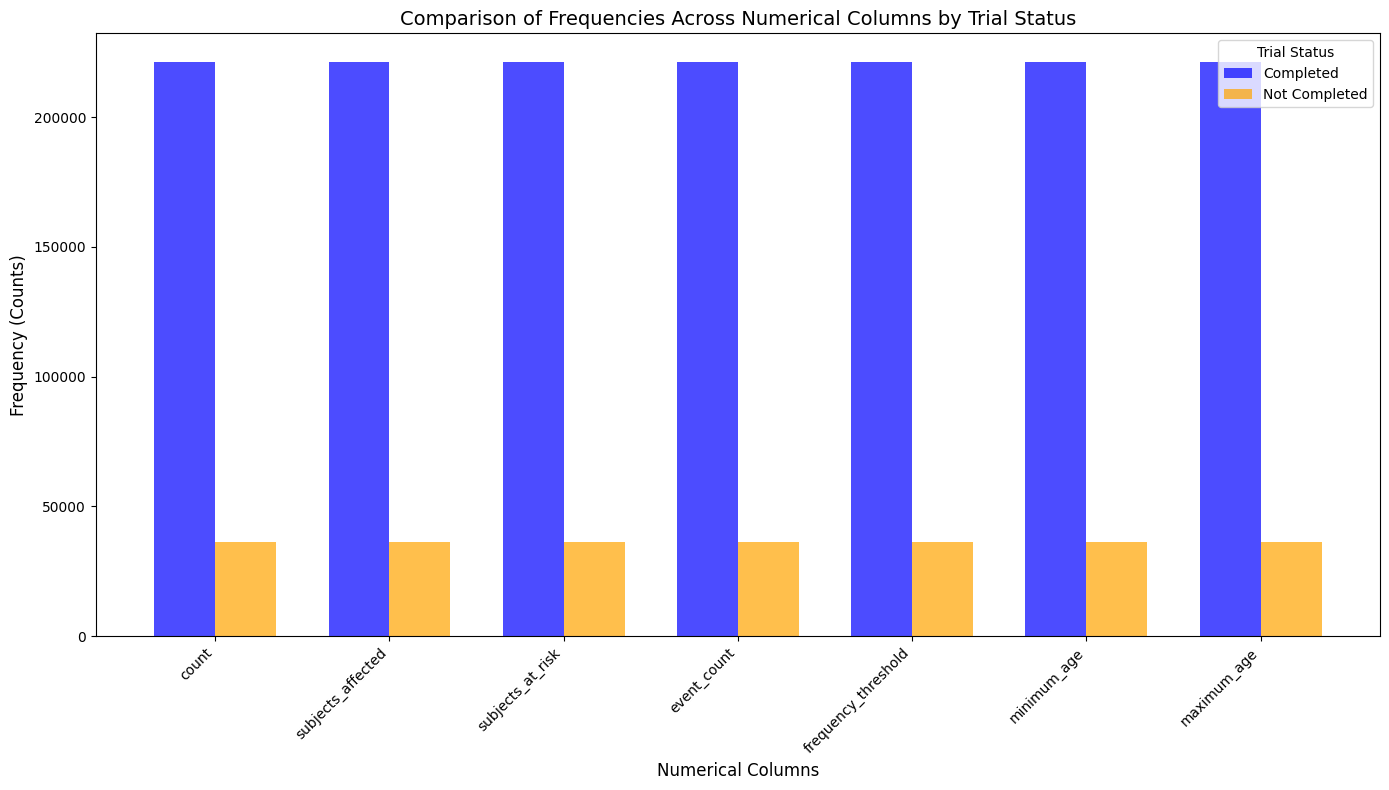

In [51]:
import matplotlib.pyplot as plt
import numpy as np

numerical_columns = ['count', 
                     'subjects_affected', 'subjects_at_risk', 'event_count', 
                     'frequency_threshold', 'minimum_age', 'maximum_age']

bar_width = 0.35
x_indices = np.arange(len(numerical_columns))

completed_counts = [data[data['trial_status'] == 'Completed'][col].count() for col in numerical_columns]
not_completed_counts = [data[data['trial_status'] == 'Not Completed'][col].count() for col in numerical_columns]

print("Frequency Counts by Trial Status:")
for i, col in enumerate(numerical_columns):
    print(f"{col}: Completed = {completed_counts[i]}, Not Completed = {not_completed_counts[i]}")

plt.figure(figsize=(14, 8))
plt.bar(x_indices, completed_counts, bar_width, label='Completed', color='blue', alpha=0.7)
plt.bar(x_indices + bar_width, not_completed_counts, bar_width, label='Not Completed', color='orange', alpha=0.7)

plt.xlabel('Numerical Columns', fontsize=12)
plt.ylabel('Frequency (Counts)', fontsize=12)
plt.title('Comparison of Frequencies Across Numerical Columns by Trial Status', fontsize=14)
plt.xticks(x_indices + bar_width / 2, numerical_columns, rotation=45, ha='right')
plt.legend(title='Trial Status', fontsize=10)
plt.tight_layout()

plt.show()


Normalizing and trying to understand data

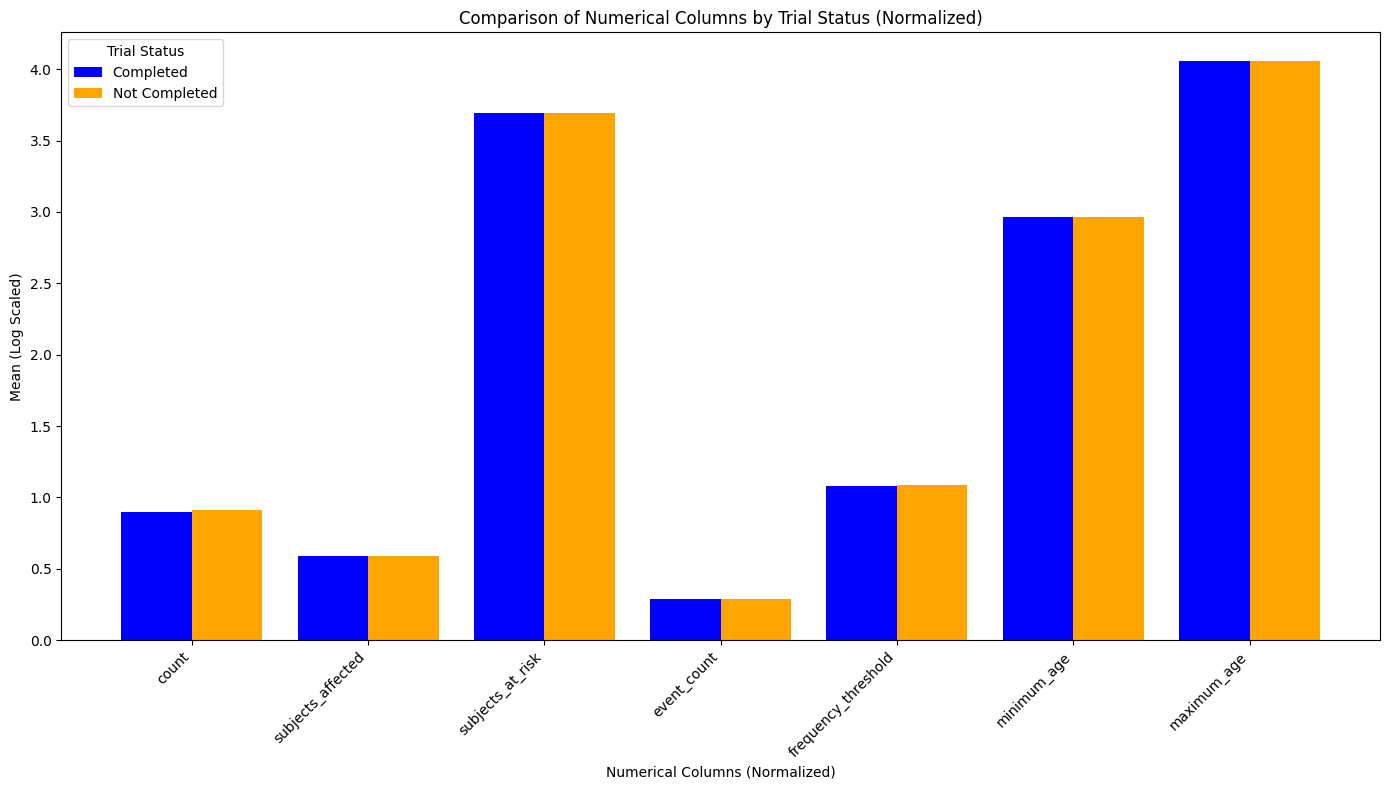

In [41]:
import numpy as np

data_normalized = data[numerical_columns].copy()
data_normalized = data_normalized.apply(lambda x: np.log1p(x)) # log scaling to reduce skewness

completed_means = []
not_completed_means = []

for col in numerical_columns:
    completed_means.append(data_normalized[data['trial_status'] == 'Completed'][col].mean())
    not_completed_means.append(data_normalized[data['trial_status'] == 'Not Completed'][col].mean())

x = np.arange(len(numerical_columns))
bar_width = 0.4

plt.figure(figsize=(14, 8))
plt.bar(x - bar_width/2, completed_means, width=bar_width, label='Completed', color='blue')
plt.bar(x + bar_width/2, not_completed_means, width=bar_width, label='Not Completed', color='orange')

plt.xticks(x, numerical_columns, rotation=45, ha='right')
plt.xlabel('Numerical Columns (Normalized)')
plt.ylabel('Mean (Log Scaled)')
plt.title('Comparison of Numerical Columns by Trial Status (Normalized)')
plt.legend(title='Trial Status')
plt.tight_layout()
plt.show()


In [42]:
for col in numerical_columns:
    print(f"{col}: Min={data[col].min()}, Max={data[col].max()}")


count: Min=0, Max=11655523
subjects_affected: Min=0.0, Max=1882.0
subjects_at_risk: Min=0, Max=77445
event_count: Min=0.0, Max=6863.0
frequency_threshold: Min=0, Max=5
minimum_age: Min=0.0, Max=95.0
maximum_age: Min=2.0, Max=120.0


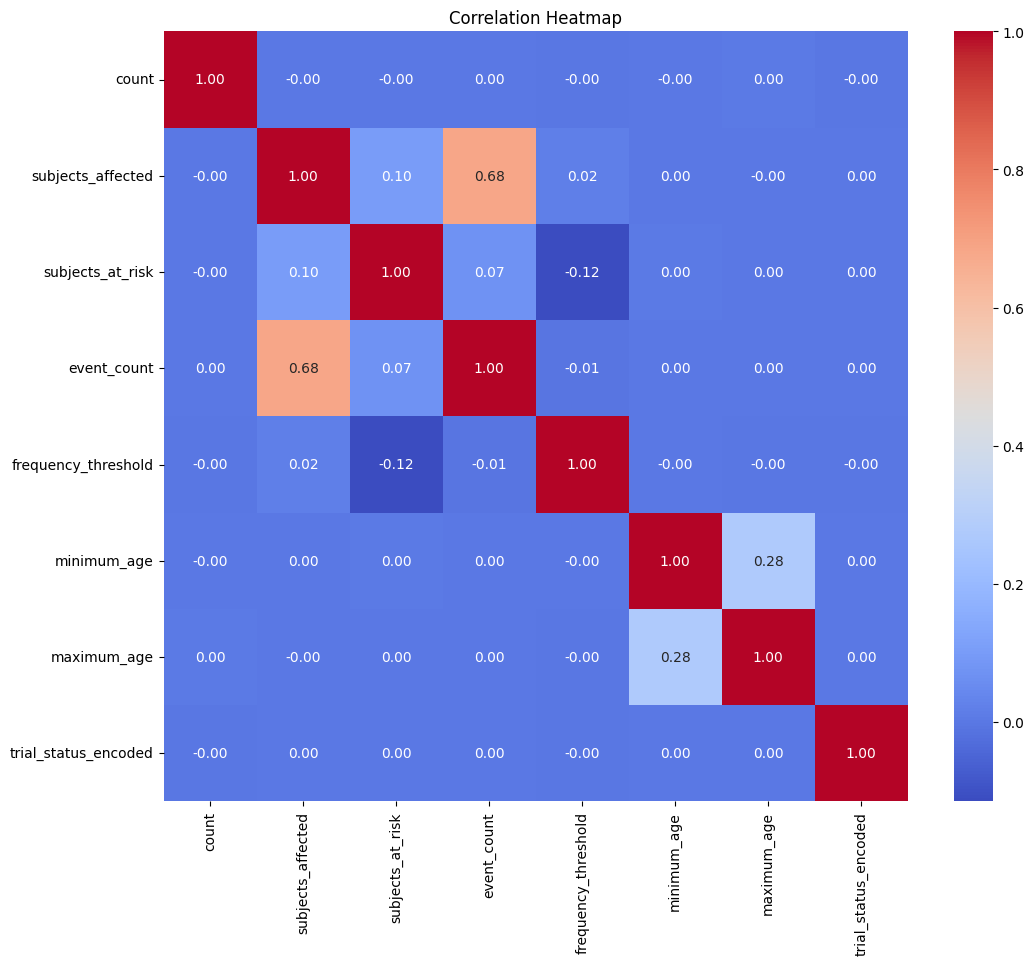

In [44]:
import seaborn as sns

data['trial_status_encoded'] = data['trial_status'].apply(lambda x: 1 if x == 'Completed' else 0)

plt.figure(figsize=(12, 10))
correlation_matrix = data[numerical_columns + ['trial_status_encoded']].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [53]:
data[numerical_columns].describe()

,count,subjects_affected,subjects_at_risk,event_count,frequency_threshold,minimum_age,maximum_age
count,2.575770e+05,257577.000000,257577.000000,257577.000000,257577.000000,257577.000000,257577.000000
mean,5.819861e+01,2.668355,311.956087,1.764358,2.949293,20.186911,60.618157
std,2.298142e+04,16.964494,1369.391526,24.780230,2.390866,10.144189,17.531907
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,0.000000e+00,0.000000,10.000000,0.000000,0.000000,18.000000,60.618157
50%,1.000000e+00,0.000000,34.000000,0.000000,5.000000,18.000000,60.618157
75%,3.000000e+00,1.000000,127.000000,0.000000,5.000000,18.000000,65.000000
max,1.165552e+07,1882.000000,77445.000000,6863.000000,5.000000,95.000000,200.000000


In [61]:
print(data.dtypes)

NCT Number                     object
Study Title                    object
Study Status                   object
Brief Summary                  object
Study Results                  object
Conditions                     object
Interventions                  object
Primary Outcome Measures       object
Secondary Outcome Measures     object
Sponsor                        object
Collaborators                  object
Sex                            object
Age                            object
Phases                         object
Enrollment                    float64
Funder Type                    object
Study Type                     object
Study Design                   object
Other IDs                      object
Start Date                     object
Primary Completion Date        object
Completion Date                object
First Posted                   object
Results First Posted           object
Last Update Posted             object
Locations                      object
id          

In [54]:
categorical_columns = data.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns:")
print(categorical_columns)

Categorical Columns:
Index(['NCT Number', 'Study Title', 'Study Status', 'Brief Summary',
       'Study Results', 'Conditions', 'Interventions',
       'Primary Outcome Measures', 'Secondary Outcome Measures', 'Sponsor',
       'Sex', 'Age', 'Phases', 'Funder Type', 'Study Type', 'Study Design',
       'Start Date', 'Primary Completion Date', 'Completion Date',
       'First Posted', 'Results First Posted', 'Last Update Posted',
       'Locations', 'nct_id', 'ctgov_group_code', 'period', 'reason',
       'sampling_method', 'gender', 'population', 'criteria', 'name', 'city',
       'state', 'zip', 'country', 'time_frame', 'event_type', 'description',
       'organ_system', 'adverse_event_term', 'vocab', 'assessment',
       'trial_status'],
      dtype='object')


In [55]:
for col in categorical_columns:
    print(f'{col}: {data[col].nunique()} unique values')

NCT Number: 257577 unique values
Study Title: 256885 unique values
Study Status: 4 unique values
Brief Summary: 256391 unique values
Study Results: 2 unique values
Conditions: 102973 unique values
Interventions: 198549 unique values
Primary Outcome Measures: 244192 unique values
Secondary Outcome Measures: 184793 unique values
Sponsor: 26239 unique values
Sex: 4 unique values
Age: 6 unique values
Phases: 8 unique values
Funder Type: 9 unique values
Study Type: 2 unique values
Study Design: 1443 unique values
Start Date: 1 unique values
Primary Completion Date: 1 unique values
Completion Date: 1 unique values
First Posted: 5733 unique values
Results First Posted: 1 unique values
Last Update Posted: 4637 unique values
Locations: 151997 unique values
nct_id: 21134 unique values
ctgov_group_code: 40 unique values
period: 5029 unique values
reason: 15678 unique values
sampling_method: 3 unique values
gender: 4 unique values
population: 55309 unique values
criteria: 255816 unique values
name

In [56]:
print(data[['adult', 'child', 'older_adult']].sum()) #encoded these already : were present as t anf f, here t=1 and f=0

adult          238208
child           50286
older_adult    196562
dtype: int64


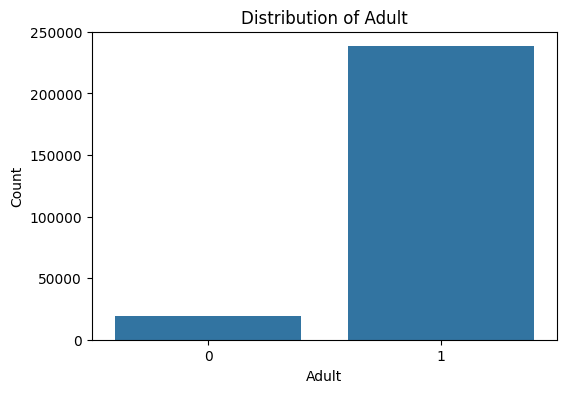

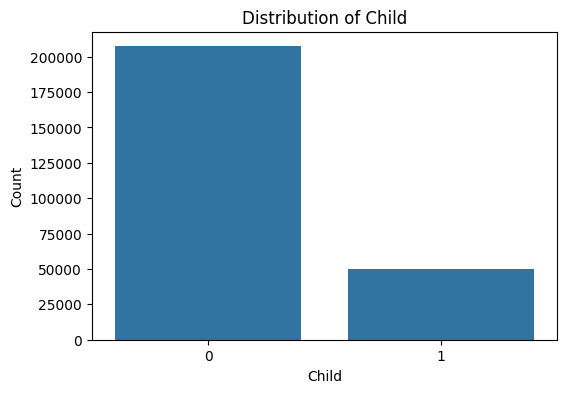

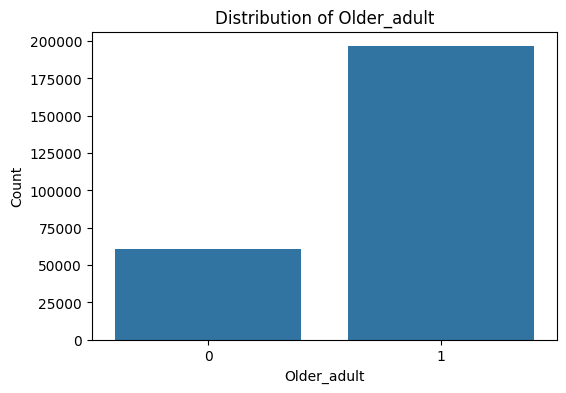

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in ['adult', 'child', 'older_adult']:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=data, x=col)
    plt.title(f'Distribution of {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Count')
    plt.show()


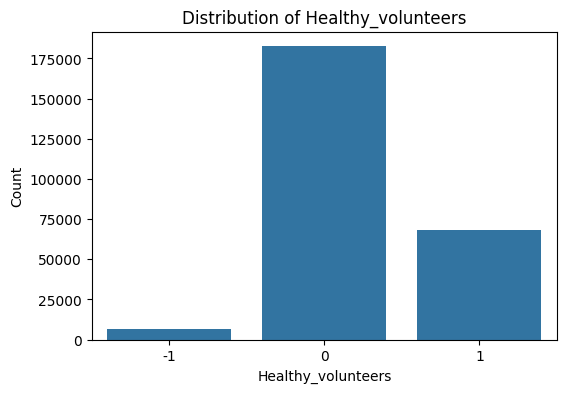

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in ['healthy_volunteers']:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=data, x=col)
    plt.title(f'Distribution of {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Count')
    plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_columns = ['Study Status','Study Results', 'Conditions',
       'Sex', 'Age', 'Phases', 'Study Type', 'Study Design',
       'Start Date', 'period', 'reason',
       'sampling_method', 'gender', 'population', 'criteria',
       'organ_system',
       'trial_status']
for col in categorical_columns:
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))  
    fig.suptitle(f'** {col} **', fontsize=16)  
    plt.style.use('seaborn-v0_8-darkgrid') 

    plt.subplot(1, 2, 1)
    data[col].value_counts().plot(kind='bar', color=sns.color_palette("tab10"))
    plt.title(f'Bar Chart of {col}')
    plt.ylabel('Count')
    plt.xlabel(col)

    plt.subplot(1, 2, 2)
    data[col].value_counts().plot(kind='pie', autopct="%.2f%%", colors=sns.color_palette("tab10"))
    plt.title(f'Pie Chart of {col}')
    plt.ylabel('')  

    plt.tight_layout()
    plt.show()


OUTLIER DETECTION

In [7]:
print(data.describe())

         Enrollment            id  result_group_id         count  \
count  2.575770e+05  2.575770e+05     2.575770e+05  2.575770e+05   
mean   4.317907e+03  5.900804e+06     8.975127e+06  5.819861e+01   
std    4.447440e+05  1.085394e+05     1.650096e+05  2.298142e+04   
min    0.000000e+00  5.698465e+06     8.661423e+06  0.000000e+00   
25%    2.400000e+01  5.825056e+06     8.861217e+06  0.000000e+00   
50%    6.000000e+01  5.907966e+06     8.987966e+06  1.000000e+00   
75%    1.560000e+02  5.998641e+06     9.129571e+06  3.000000e+00   
max    1.888141e+08  6.144648e+06     9.342312e+06  1.165552e+07   

         minimum_age    maximum_age  healthy_volunteers          adult  \
count  257577.000000  257577.000000       257577.000000  257577.000000   
mean       20.186911      60.618157            0.239994       0.924803   
std        10.144189      17.531907            0.483336       0.263709   
min         0.000000       2.000000           -1.000000       0.000000   
25%        18.000

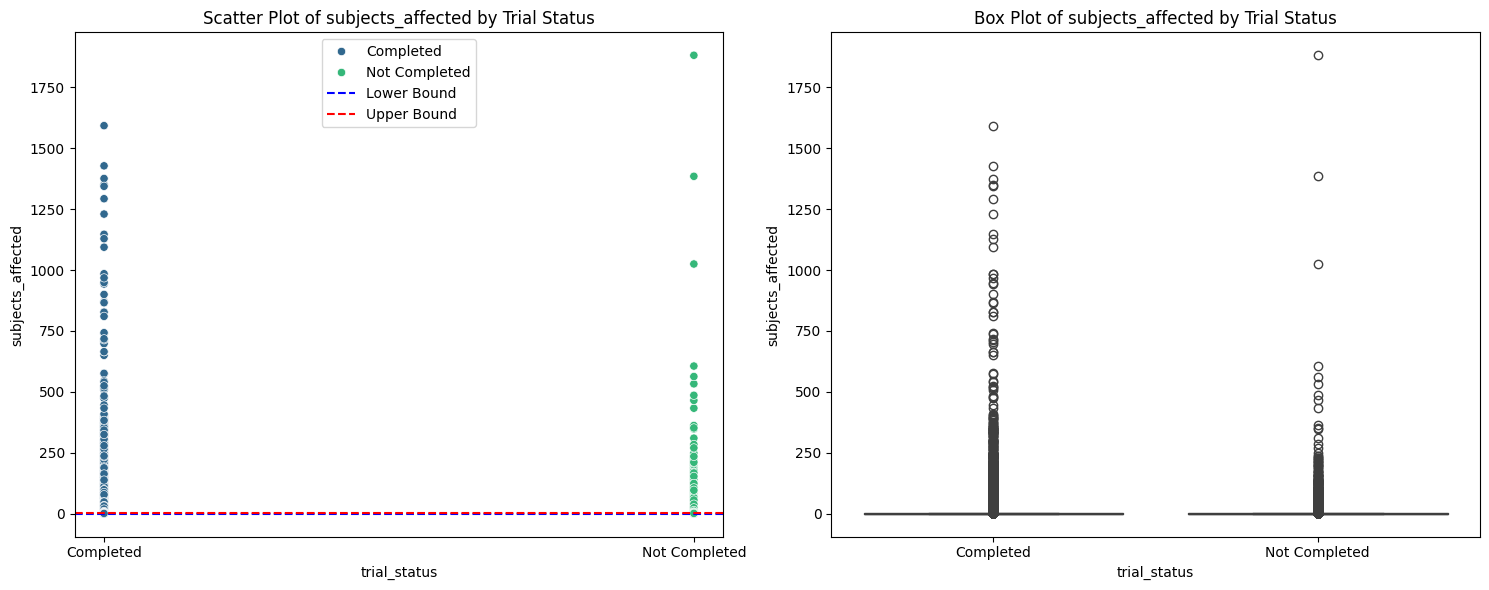

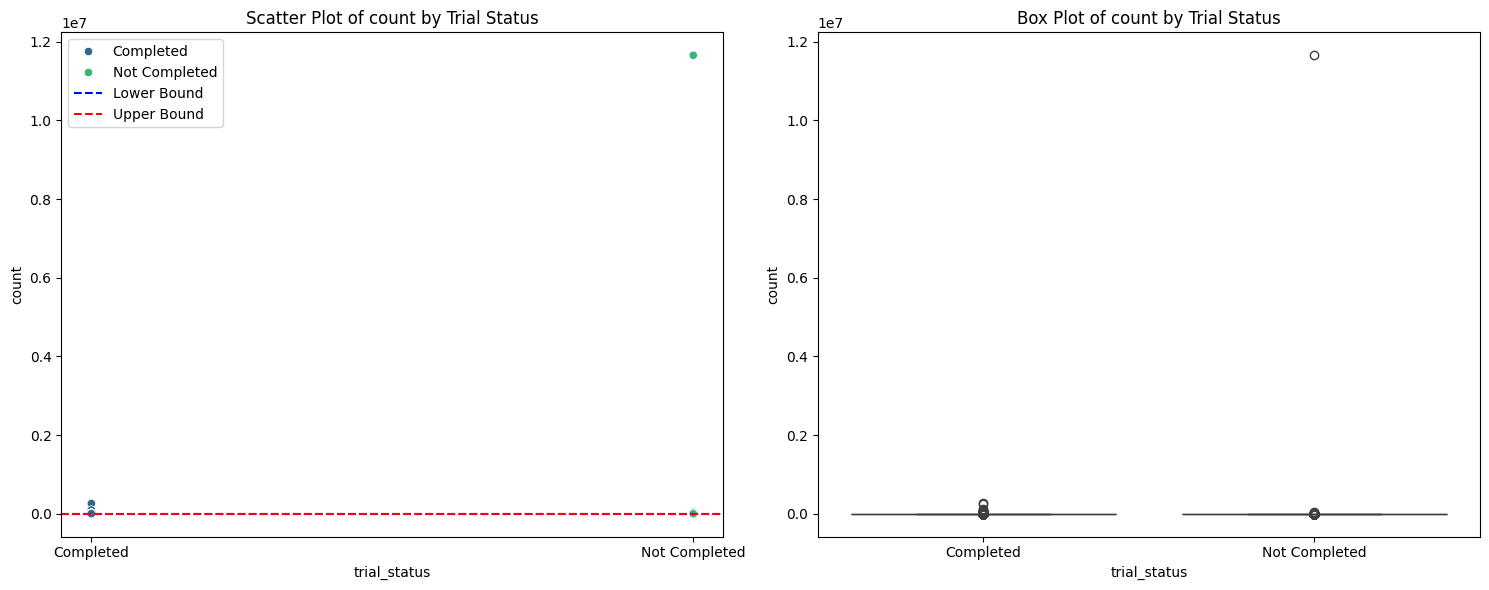

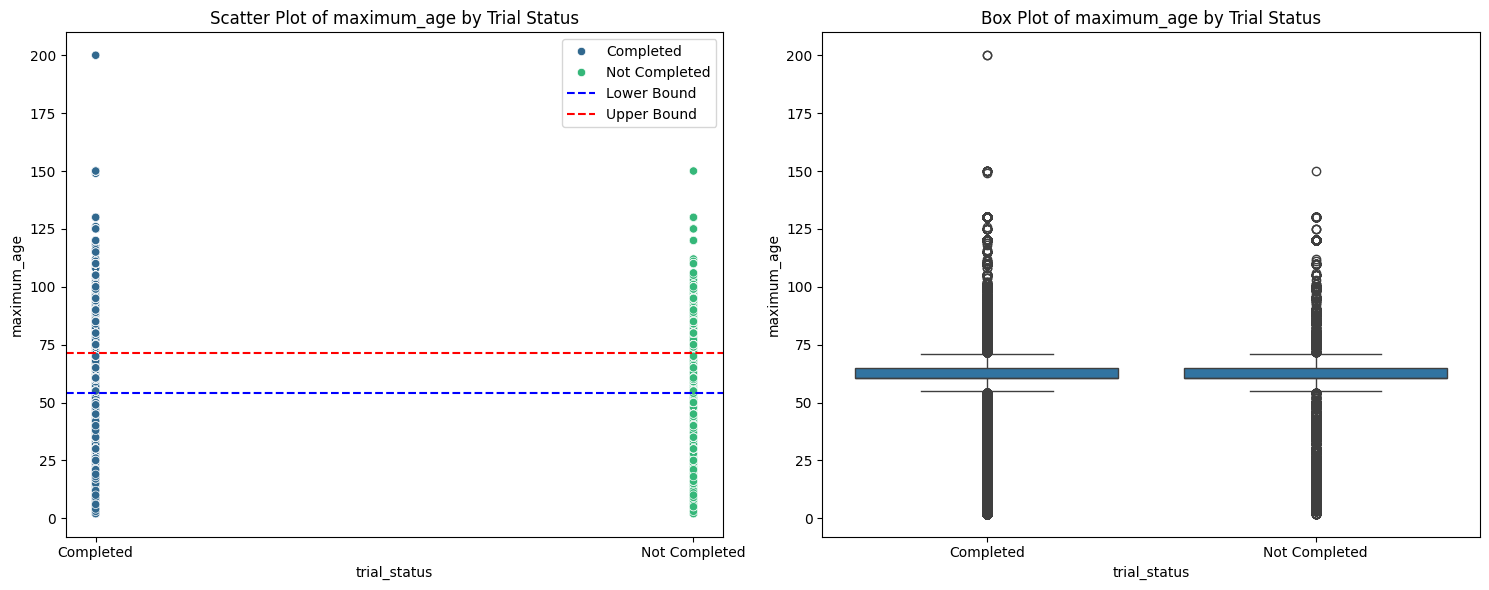

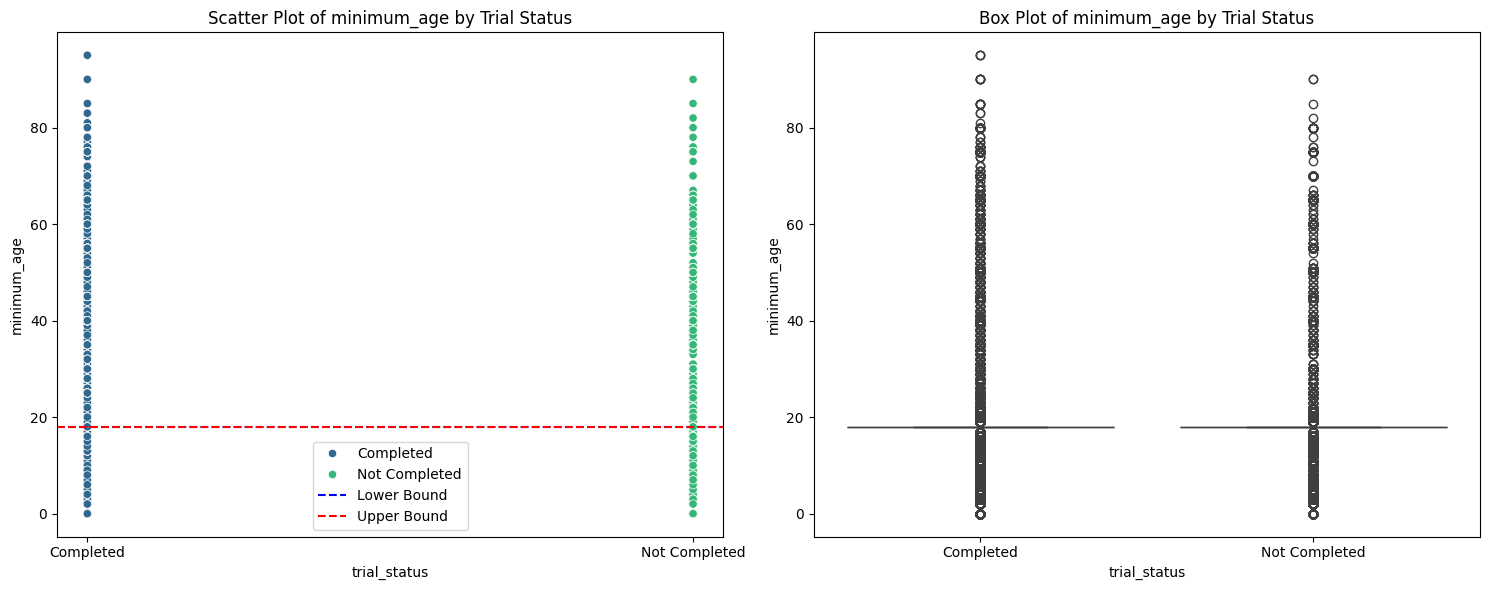

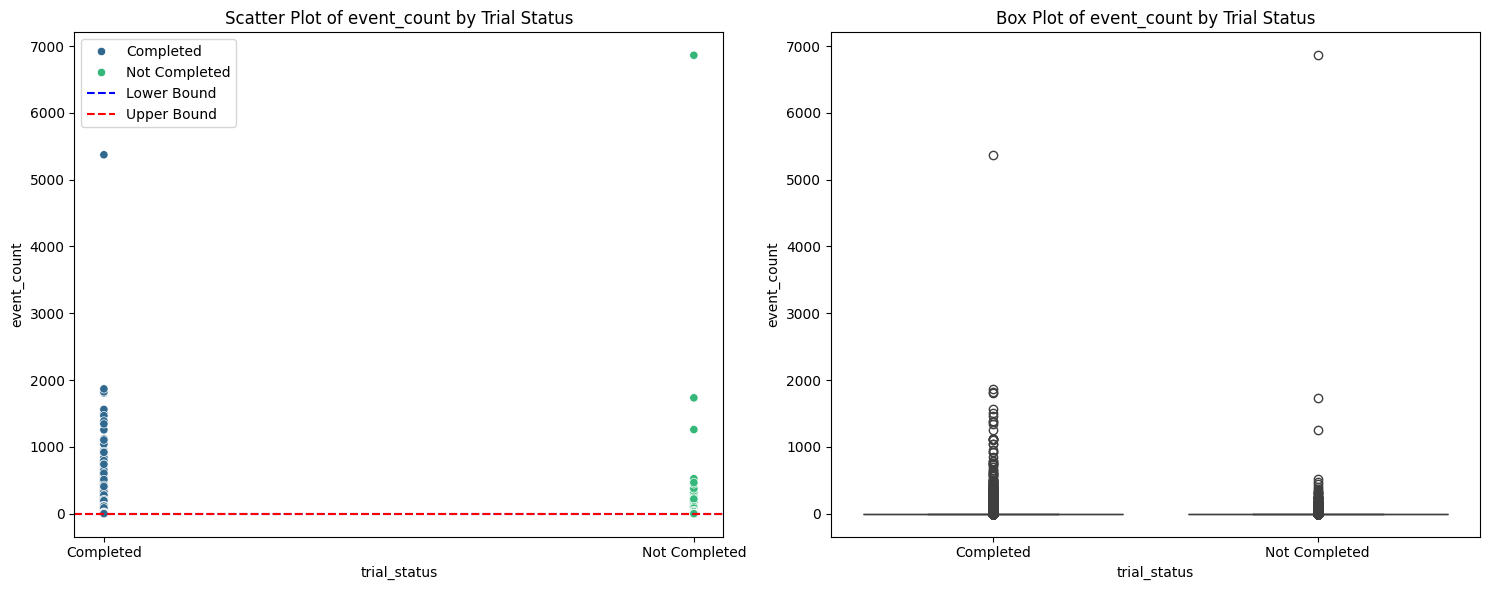

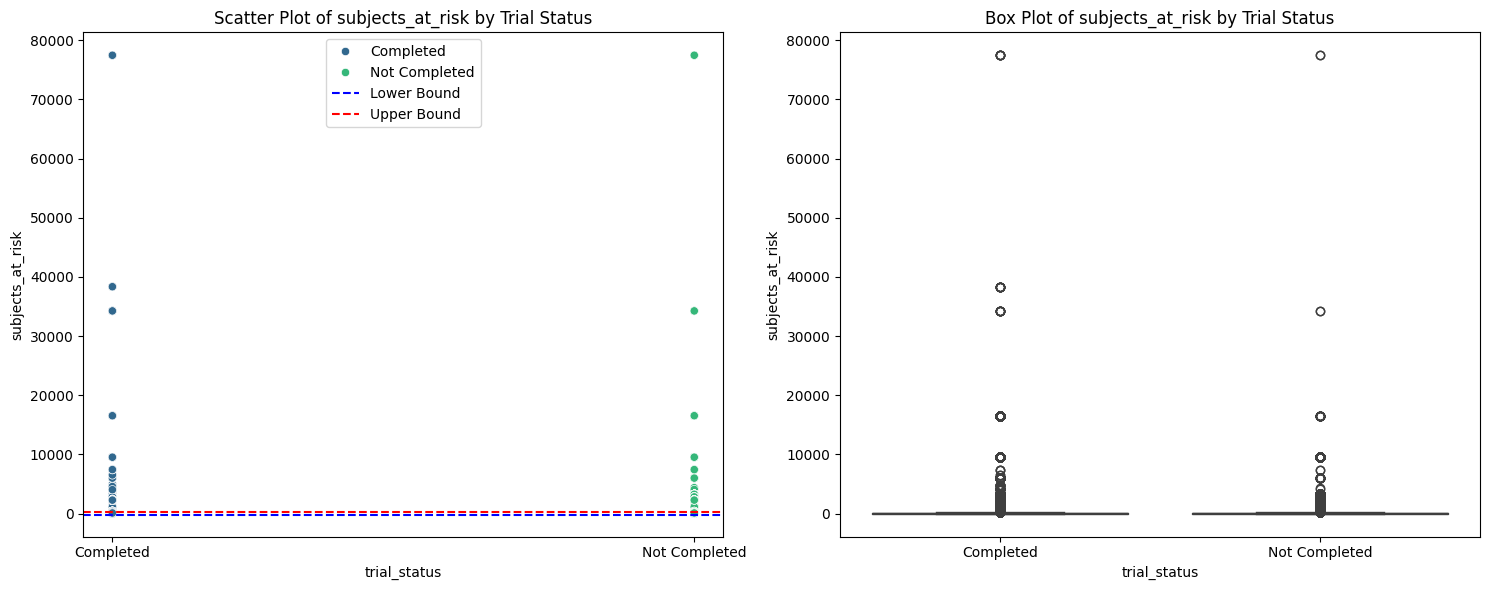

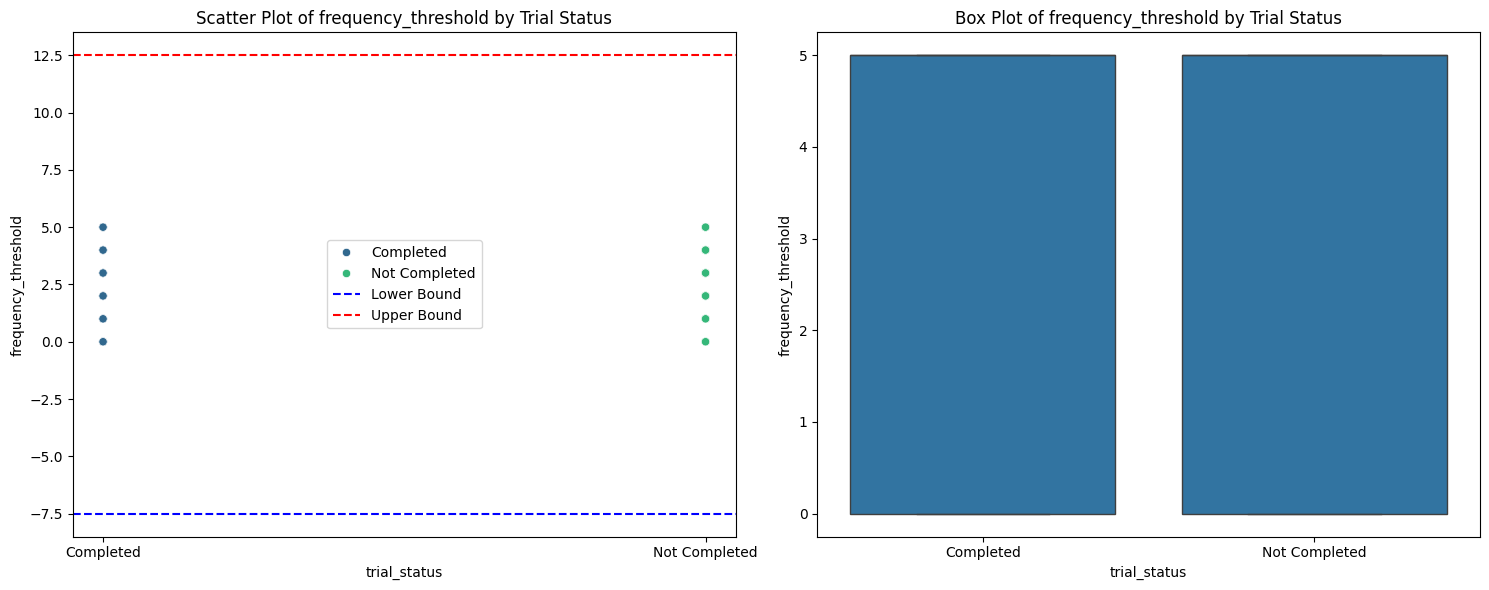

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

columns_to_check = ['subjects_affected', 'count','maximum_age','minimum_age', 'event_count','subjects_at_risk', 'frequency_threshold']

for col in columns_to_check:
    fig, axes = plt.subplots(1, 2, figsize=(15, 6), gridspec_kw={'width_ratios': [1, 1]})

    sns.scatterplot(data=data, x='trial_status', y=col, hue='trial_status', ax=axes[0], palette='viridis')
    axes[0].set_title(f'Scatter Plot of {col} by Trial Status')
    axes[0].axhline(data[col].quantile(0.25) - 1.5 * (data[col].quantile(0.75) - data[col].quantile(0.25)),
                    color='blue', linestyle='--', label='Lower Bound')
    axes[0].axhline(data[col].quantile(0.75) + 1.5 * (data[col].quantile(0.75) - data[col].quantile(0.25)),
                    color='red', linestyle='--', label='Upper Bound')
    axes[0].legend()

    sns.boxplot(data=data, x='trial_status', y=col, ax=axes[1])
    axes[1].set_title(f'Box Plot of {col} by Trial Status')

    plt.tight_layout()
    plt.show()


Use the Interquartile Range (IQR) method to identify outliers for each variable and calculate the percentage of outliers in each target class.

In [9]:
def detect_outliers_iqr(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

for col in columns_to_check:
    outliers, lower, upper = detect_outliers_iqr(data, col)
    print(f"Column: {col}")
    print(f"Lower Bound: {lower}, Upper Bound: {upper}")
    print(f"Total Outliers: {len(outliers)}")
    print(outliers['trial_status'].value_counts())
    print("\n")


Column: subjects_affected
Lower Bound: -1.5, Upper Bound: 2.5
Total Outliers: 40188
trial_status
Completed        34445
Not Completed     5743
Name: count, dtype: int64


Column: count
Lower Bound: -4.5, Upper Bound: 7.5
Total Outliers: 32320
trial_status
Completed        27594
Not Completed     4726
Name: count, dtype: int64


Column: maximum_age
Lower Bound: 54.04539236177085, Upper Bound: 71.5727645829375
Total Outliers: 88564
trial_status
Completed        76015
Not Completed    12549
Name: count, dtype: int64


Column: minimum_age
Lower Bound: 18.0, Upper Bound: 18.0
Total Outliers: 71683
trial_status
Completed        61529
Not Completed    10154
Name: count, dtype: int64


Column: event_count
Lower Bound: 0.0, Upper Bound: 0.0
Total Outliers: 56339
trial_status
Completed        48428
Not Completed     7911
Name: count, dtype: int64


Column: subjects_at_risk
Lower Bound: -165.5, Upper Bound: 302.5
Total Outliers: 32190
trial_status
Completed        27694
Not Completed     4496
Nam

In [14]:
outlier_data = {}

columns_and_bounds = {
    'subjects_affected': (-1.5, 2.5),
}

for col, (lb, ub) in columns_and_bounds.items():
    outliers = data[(data[col] < lb) | (data[col] > ub)]
    outlier_data[col] = outliers
    print(f"Outliers in {col}:")
    print(outliers[[col, 'trial_status']].head(20))  


Outliers in subjects_affected:
    subjects_affected   trial_status
0                 4.0      Completed
4                 4.0      Completed
6                 4.0      Completed
8                26.0      Completed
9                 6.0      Completed
10                4.0      Completed
11                4.0      Completed
12                4.0      Completed
13                8.0  Not Completed
14                6.0      Completed
15                4.0      Completed
16                7.0      Completed
17                5.0      Completed
18                4.0      Completed
19                5.0      Completed
20                4.0      Completed
21                5.0      Completed
22                4.0  Not Completed
23                7.0      Completed
24                4.0      Completed
Total Outliers: 40188



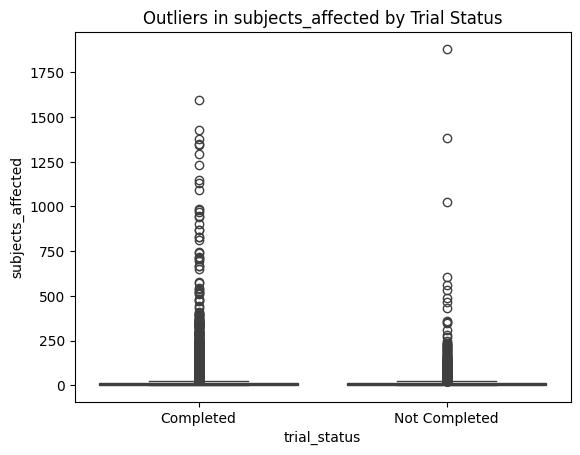

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in outlier_data.keys():
    sns.boxplot(data=outlier_data[col], x='trial_status', y=col)
    plt.title(f'Outliers in {col} by Trial Status')
    plt.show()


In [17]:
#Do the outliers belong disproportionately to Completed or Not Completed trials??
for col, outliers in outlier_data.items():
    print(f"{col} Outlier Distribution by Trial Status:")
    print(outliers['trial_status'].value_counts())
    print("\n")

#Are there patterns in other features for rows with outliers??
for col, outliers in outlier_data.items():
    print(f"Summary statistics for outliers in {col}:")
    print(outliers.describe())



subjects_affected Outlier Distribution by Trial Status:
trial_status
Completed        34445
Not Completed     5743
Name: count, dtype: int64


Summary statistics for outliers in subjects_affected:
         Enrollment            id  result_group_id          count  \
count  4.018800e+04  4.018800e+04     4.018800e+04   40188.000000   
mean   3.459699e+03  5.886345e+06     8.952714e+06      14.487036   
std    2.247667e+05  1.127637e+05     1.714592e+05    1284.205681   
min    0.000000e+00  5.698468e+06     8.661424e+06       0.000000   
25%    2.400000e+01  5.811492e+06     8.840232e+06       0.000000   
50%    6.000000e+01  5.895508e+06     8.968432e+06       1.000000   
75%    1.540000e+02  5.951753e+06     9.058062e+06       3.000000   
max    3.658029e+07  6.144646e+06     9.342312e+06  256446.000000   

        minimum_age   maximum_age  healthy_volunteers         adult  \
count  40188.000000  40188.000000        40188.000000  40188.000000   
mean      20.215910     60.607289      